In [107]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.units as munits
import numpy as np

# Forecasting Lapa station temperature

In [108]:
df_binary_features = pd.read_csv("../data/processed/df_binary_features.csv")
df_binary_features = df_binary_features.dropna()
df_binary_features = df_binary_features.drop(["month", "season", "uhi_outlier"], axis=1)

df_continuous_features = pd.read_csv("../data/processed/df_continuous_features.csv")
df_continuous_features = df_continuous_features.dropna()

In [109]:
ts = df_continuous_features[["timestamp"]]
ts.head()

timestamp
2  2016-01-21 16:00:00
3  2016-01-21 17:00:00
4  2016-01-21 18:00:00
5  2016-01-21 19:00:00
6  2016-01-21 20:00:00

In [110]:
def make_steps(df, y, steps):
    for i in range(steps):
        df[f"{y}_step_{i+1}"] = df[y].shift(-i+1)
    return df

steps = 3
y = make_steps(df=df_continuous_features[["uhi"]], y="uhi", steps=steps).drop("uhi", axis=1)
y = y.dropna()

y

/tmp/ipykernel_1541/3948321810.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f"{y}_step_{i+1}"] = df[y].shift(-i+1)
/tmp/ipykernel_1541/3948321810.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f"{y}_step_{i+1}"] = df[y].shift(-i+1)
/tmp/ipykernel_1541/3948321810.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

uhi_step_1  uhi_step_2  uhi_step_3
3        1.757333    1.762333    2.415333
4        1.762333    2.415333    3.033167
5        2.415333    3.033167    3.102167
6        3.033167    3.102167    2.516167
7        3.102167    2.516167    3.082000
...           ...         ...         ...
26979   -3.261500   -0.678167    2.385333
26980   -0.678167    2.385333    2.933833
26981    2.385333    2.933833    3.944667
26982    2.933833    3.944667    4.841000
26983    3.944667    4.841000    3.652000

[25941 rows x 3 columns]

In [111]:
X_binary_features = df_binary_features.drop(["timestamp"], axis=1)
X_binary_features = X_binary_features.loc[y.index.min():y.index.max()]
X_binary_features

hour  uhi_outlier_lag_1H  uhi_outlier_lag_2H  \
3        17                 0.0                 0.0   
4        18                 0.0                 0.0   
5        19                 0.0                 0.0   
6        20                 0.0                 0.0   
7        21                 0.0                 0.0   
...     ...                 ...                 ...   
26979    17                 0.0                 0.0   
26980    18                 0.0                 0.0   
26981    19                 0.0                 0.0   
26982    20                 0.0                 0.0   
26983    21                 0.0                 0.0   

       uhi_outlier_window_3H_sum  uhi_outlier_window_6H_sum  \
3                            0.0                        0.0   
4                            0.0                        0.0   
5                            0.0                        0.0   
6                            0.0                        0.0   
7                            0.0                        0.0   
...                          ...                        ...   
26979                        0.0                        0.0   
26980                        0.0                        0.0   
26981                        0.0                        0.0   
26982                        0.0                        0.0   
26983                        0.0                        0.0   

       uhi_outlier_window_12H_sum  season_autumn_winter  season_spring_summer  
3                             0.0                     0                     1  
4                             0.0                     0                     1  
5                             0.0                     0                     1  
6                             0.0                     0                     1  
7                             0.0                     0                     1  
...                           ...                   ...                   ...  
26979                         0.0                     0                     1  
26980                         0.0                     0                     1  
26981                         0.0                     0                     1  
26982                         0.0                     0                     1  
26983                         0.0                     0                     1  

[26981 rows x 8 columns]

In [112]:
X_continuous_features = df_continuous_features.drop(["timestamp", "uhi"], axis=1)
X_continuous_features = X_continuous_features.loc[y.index.min():y.index.max()]
X_continuous_features

uhi_lag_1H  uhi_lag_2H  uhi_window_3H_mean  uhi_window_3H_std  \
3        1.757333    0.900167            1.243700           0.453193   
4        1.762333    1.757333            1.473278           0.496335   
5        2.415333    1.762333            1.978333           0.378461   
6        3.033167    2.415333            2.403611           0.635498   
7        3.102167    3.033167            2.850222           0.378202   
...           ...         ...                 ...                ...   
26979   -3.261500   -2.707000           -2.762111           0.474241   
26980   -0.678167   -3.261500           -2.215556           1.359978   
26981    2.385333   -0.678167           -0.518111           2.826817   
26982    2.933833    2.385333            1.547000           1.946468   
26983    3.944667    2.933833            3.087944           0.791007   

       uhi_window_3H_min  uhi_window_3H_max  uhi_window_6H_mean  \
3               0.900167           1.757333            1.243700   
4               0.900167           1.762333            1.373358   
5               1.757333           2.415333            1.581753   
6               1.762333           3.033167            1.823656   
7               2.415333           3.102167            2.161750   
...                  ...                ...                 ...   
26979          -3.261500          -2.317833           -2.575294   
26980          -3.261500          -0.678167           -2.358211   
26981          -3.261500           2.385333           -1.522556   
26982          -0.678167           2.933833           -0.607556   
26983           2.385333           3.944667            0.436194   

       uhi_window_6H_std  uhi_window_6H_min  uhi_window_6H_max  \
3               0.453193           0.900167           1.757333   
4               0.451849           0.900167           1.762333   
5               0.608497           0.900167           2.415333   
6               0.804559           0.900167           3.033167   
7               0.851203           0.900167           3.102167   
...                  ...                ...                ...   
26979           0.426919          -3.261500          -1.980667   
26980           0.880234          -3.261500          -0.678167   
26981           2.102962          -3.261500           2.385333   
26982           2.678804          -3.261500           2.933833   
26983           3.070542          -3.261500           3.944667   

       uhi_window_12H_mean  uhi_window_12H_std  uhi_window_12H_min  \
3                 1.243700            0.453193            0.900167   
4                 1.373358            0.451849            0.900167   
5                 1.581753            0.608497            0.900167   
6                 1.823656            0.804559            0.900167   
7                 2.006300            0.879171            0.900167   
...                    ...                 ...                 ...   
26979            -0.935206            1.943652           -3.261500   
26980            -1.107918            1.812834           -3.261500   
26981            -1.005388            1.983825           -3.261500   
26982            -0.864888            2.211923           -3.261500   
26983            -0.624573            2.583228           -3.261500   

       uhi_window_12H_max  month_sin  month_cos  hour_sin  hour_cos  
3                1.757333   0.500000   0.866025 -0.997669 -0.068242  
4                1.762333   0.500000   0.866025 -0.979084  0.203456  
5                2.415333   0.500000   0.866025 -0.887885  0.460065  
6                3.033167   0.500000   0.866025 -0.730836  0.682553  
7                3.102167   0.500000   0.866025 -0.519584  0.854419  
...                   ...        ...        ...       ...       ...  
26979            1.388333   0.866025   0.500000 -0.997669 -0.068242  
26980            1.388333   0.866025   0.500000 -0.979084  0.203456  
26981            2.385333   0.866025   0.500000 -0.887885  0.460065  
269

In [113]:
ts = ts.loc[y.index.min():y.index.max()]
ts

timestamp
3      2016-01-21 17:00:00
4      2016-01-21 18:00:00
5      2016-01-21 19:00:00
6      2016-01-21 20:00:00
7      2016-01-21 21:00:00
...                    ...
26979  2019-02-18 17:00:00
26980  2019-02-18 18:00:00
26981  2019-02-18 19:00:00
26982  2019-02-18 20:00:00
26983  2019-02-18 21:00:00

[25941 rows x 1 columns]

In [114]:
# the following code lines are necessary to import custom module
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.multioutput import RegressorChain
from sklearn.ensemble import HistGradientBoostingRegressor, RandomForestRegressor

from sklearn.linear_model import (LassoCV, RidgeCV, TweedieRegressor, RANSACRegressor, 
                                  TheilSenRegressor, HuberRegressor, PassiveAggressiveRegressor,
                                  ElasticNetCV, BayesianRidge, QuantileRegressor)

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import GridSearchCV, HalvingGridSearchCV

scaler = StandardScaler()
scaler.fit(X_continuous_features)
X_standard_continuous_features = scaler.transform(X_continuous_features)

test_size = 0.30
X_train_ref, X_test_ref, _, _ = train_test_split(X_continuous_features, y, test_size=0.30, shuffle=False)
X_train, X_test, y_train, y_test = train_test_split(X_standard_continuous_features, y, test_size=test_size, shuffle=False)

In [115]:
X_train = pd.DataFrame(X_train, columns=X_train_ref.columns, index=X_train_ref.index)
X_train = X_train.merge(X_binary_features, left_index=True, right_index=True)

X_test = pd.DataFrame(X_test, columns=X_test_ref.columns, index=X_test_ref.index)
X_test = X_test.merge(X_binary_features, left_index=True, right_index=True)

In [116]:
##### RIDGE
# MSE
# Mean: 1.39
# Standard deviation: +-1.08

# model = RegressorChain(
#     RidgeCV(
#         alphas=np.logspace(-6, 6, 25), 
#         cv=TimeSeriesSplit(n_splits=3),
#     )
# )

###### LASSO
# MSE
# Mean: 1.37
# Standard deviation: +-1.1

# c/ 3 steps
# MSE
# Mean: 1.25
# Standard deviation: +-1.22

# model = RegressorChain(
#     LassoCV(
#         max_iter=500,
#         cv=TimeSeriesSplit(n_splits=3),
#         n_jobs=-1,
#         random_state=123
#     )
# )

###### GB
# MSE
# Mean: 1.41
# Standard deviation: +-1.13

# c/ 3 steps + standard
# MSE
# Mean: 1.25
# Standard deviation: +-1.22

# model = RegressorChain(
#     HistGradientBoostingRegressor( 
#         warm_start=True,
#         early_stopping=False,
#         random_state=123
#     )
# )

# MSE
# Mean: 1.41
# Standard deviation: +-1.13

# model = RegressorChain(
#     base_estimator=HalvingGridSearchCV(
#         estimator=HistGradientBoostingRegressor(random_state=123),
#         param_grid = {
#             "max_depth": np.arange(10, 40, 10, dtype=int),
#             "learning_rate": np.logspace(-3, -1, 3)
#         },
#         cv=TimeSeriesSplit(n_splits=3),
#         scoring="neg_mean_squared_error",
#         random_state=123,
#         n_jobs=-1
#     ),
#     random_state=123
# )

##### ElasticNetCV
# MSE
# Mean: 1.36
# Standard deviation: +-1.09

# model = RegressorChain(
#     ElasticNetCV(
#         cv=TimeSeriesSplit(n_splits=3),
#         n_jobs=-1,
#         random_state=123
#     )
# )

##### MLP
# c/ 3 steps
# MSE
# Mean: 1.28
# Standard deviation: +-1.2

model = RegressorChain(
    MLPRegressor(
        hidden_layer_sizes=(500,), 
        max_iter=500,
        random_state=123
    )
)

# model = RegressorChain(
#     QuantileRegressor(
#         quantile=0.70
#     )
# )

model.fit(X_train, y_train)

RegressorChain(base_estimator=MLPRegressor(hidden_layer_sizes=(500,),
                                           max_iter=500, random_state=123))

In [117]:
# y_fit = pd.DataFrame(model.predict(X_train), index=X_train.index, columns=y.columns)
y_pred = pd.DataFrame(model.predict(X_test), index=X_test_ref.index, columns=y.columns)

<AxesSubplot: >

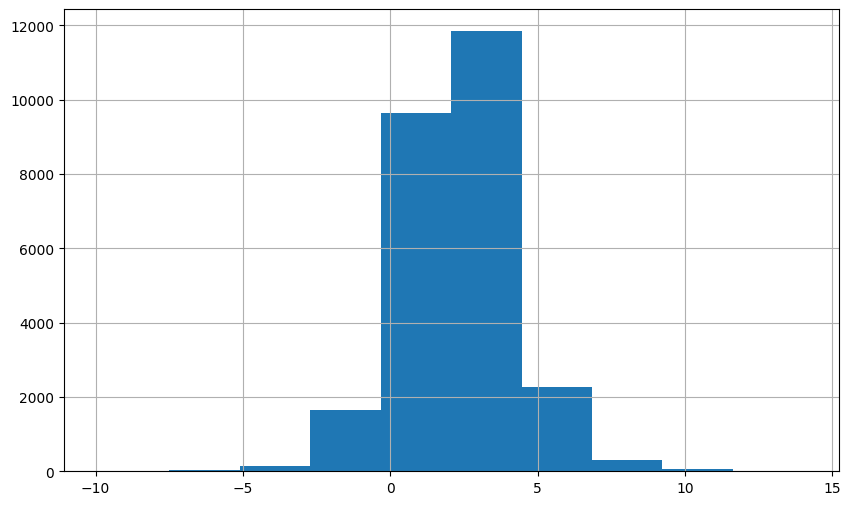

In [118]:
df_continuous_features.uhi.hist()

<AxesSubplot: xlabel='timestamp'>

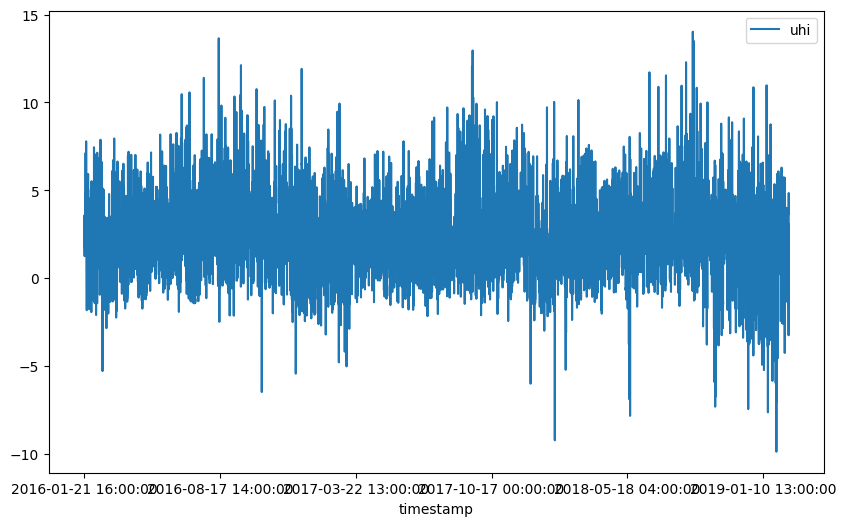

In [119]:
df_continuous_features[["timestamp", "uhi"]].set_index("timestamp").plot()

<AxesSubplot: xlabel='timestamp'>

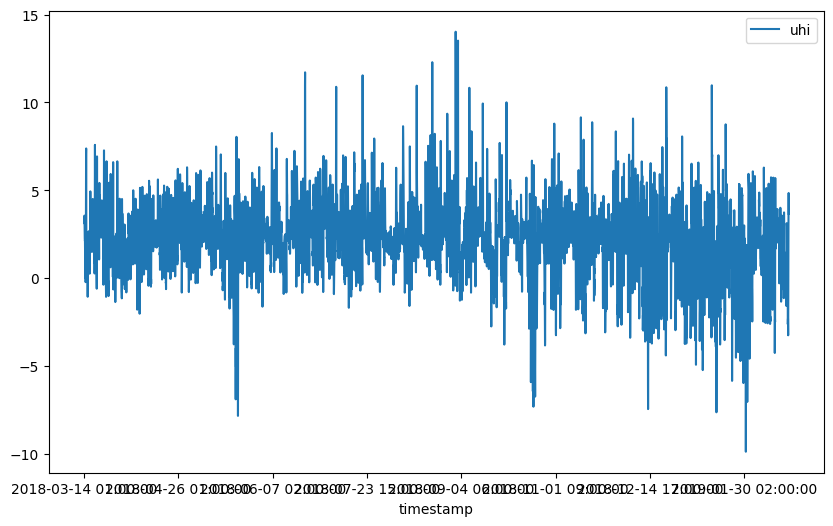

In [120]:
test = df_continuous_features[X_test_ref.index[0]:X_test_ref.index[-1]][["timestamp", "uhi"]].set_index("timestamp")
test.plot()

In [121]:
test.index = pd.to_datetime(test.index)
test

uhi
timestamp                    
2018-03-14 01:00:00  3.127167
2018-03-14 02:00:00  3.259833
2018-03-14 03:00:00  3.409000
2018-03-14 04:00:00  3.553500
2018-03-14 05:00:00  2.924167
...                       ...
2019-02-18 18:00:00  2.385333
2019-02-18 19:00:00  2.933833
2019-02-18 20:00:00  3.944667
2019-02-18 21:00:00  4.841000
2019-02-18 22:00:00  3.652000

[7474 rows x 1 columns]

In [122]:
ts.timestamp = pd.to_datetime(ts.timestamp)
y_pred["timestamp"] = ts[y_pred.index[0]:y_pred.index[-1]]["timestamp"]
y_pred = y_pred.dropna()
y_pred

uhi_step_1  uhi_step_2  uhi_step_3           timestamp
18780    3.124595    2.810616    2.424530 2018-03-14 02:00:00
18781    3.252463    3.016978    2.421990 2018-03-14 03:00:00
18782    3.390633    3.191426    2.832345 2018-03-14 04:00:00
18783    3.538072    3.319360    2.923313 2018-03-14 05:00:00
18784    2.937510    2.616366    2.643141 2018-03-14 06:00:00
...           ...         ...         ...                 ...
26979   -3.276045   -2.430742   -2.239021 2019-02-18 17:00:00
26980   -0.730146    1.111398    2.181100 2019-02-18 18:00:00
26981    2.344746    3.553414    3.951787 2019-02-18 19:00:00
26982    2.880463    3.177569    3.313516 2019-02-18 20:00:00
26983    3.889790    4.368480    3.961538 2019-02-18 21:00:00

[7472 rows x 4 columns]

/tmp/ipykernel_1541/1871912047.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(9,3))


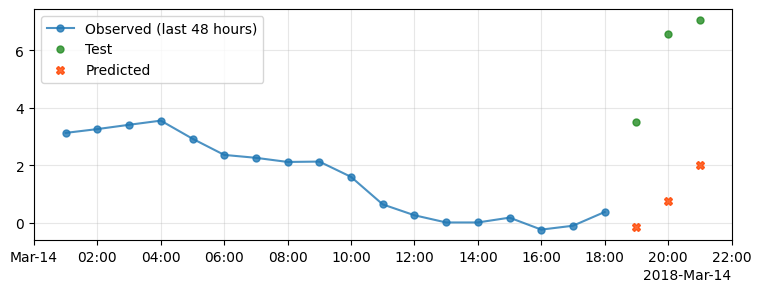

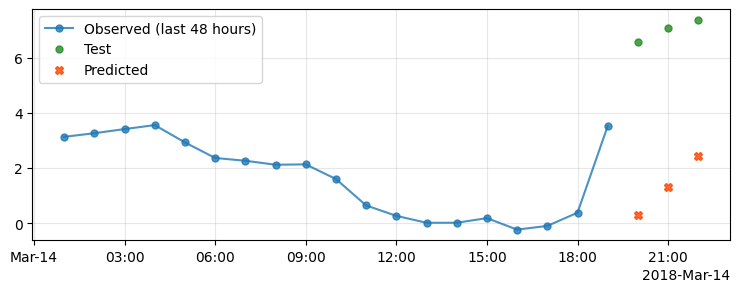

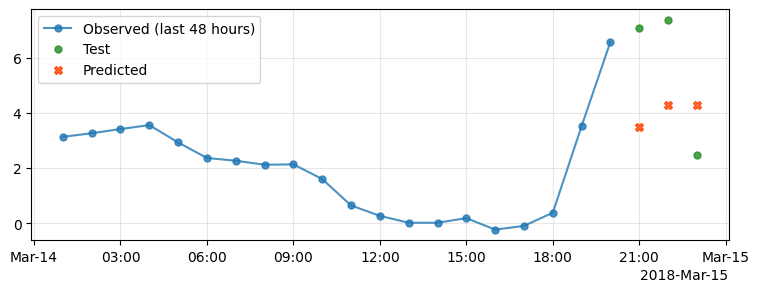

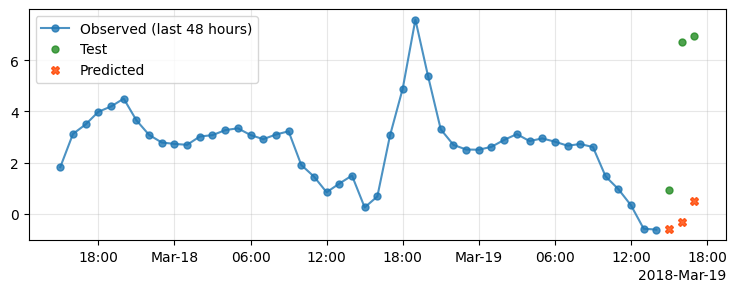

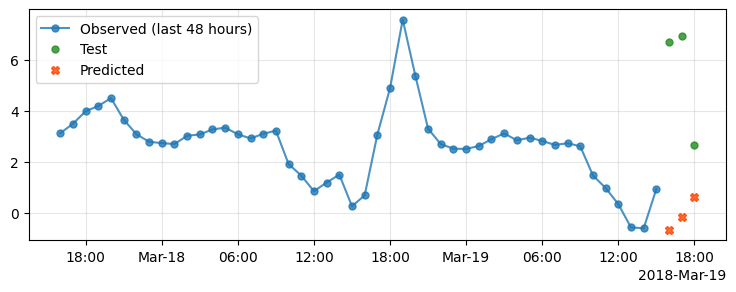

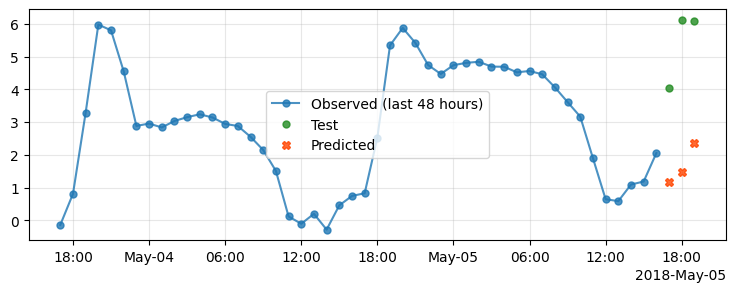

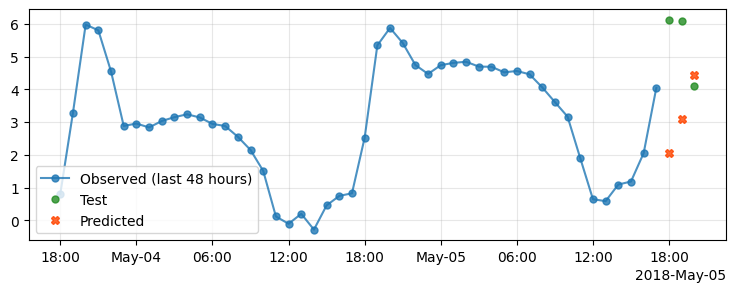

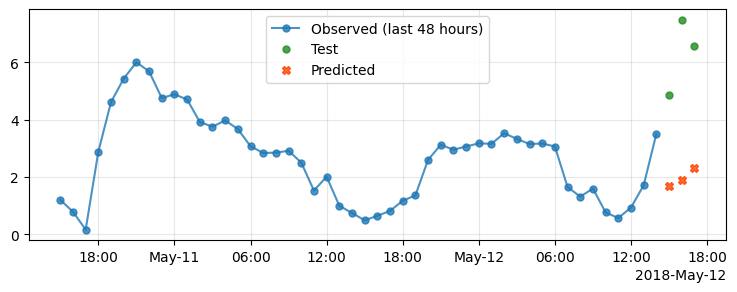

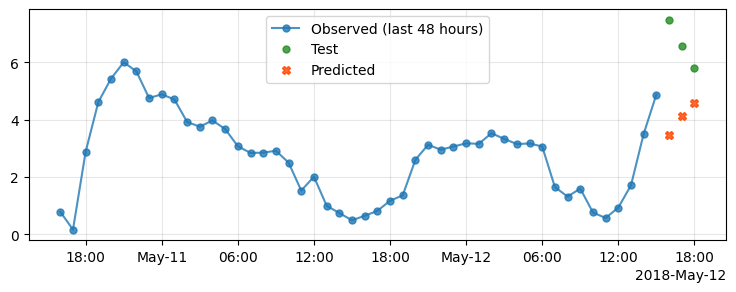

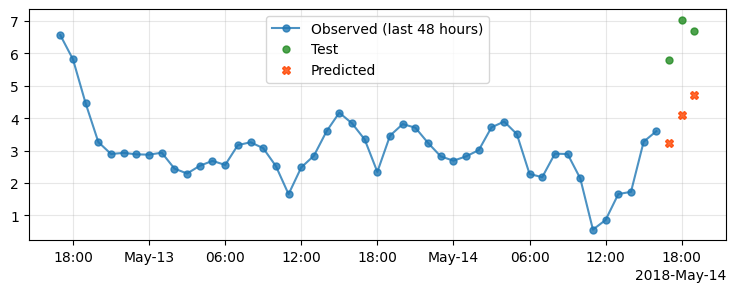

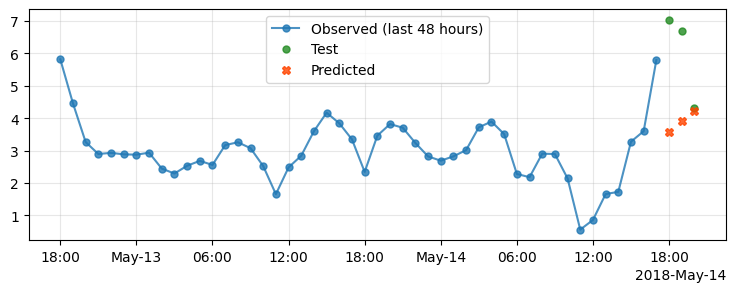

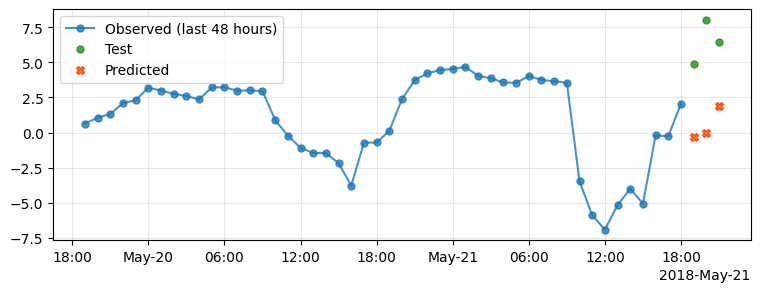

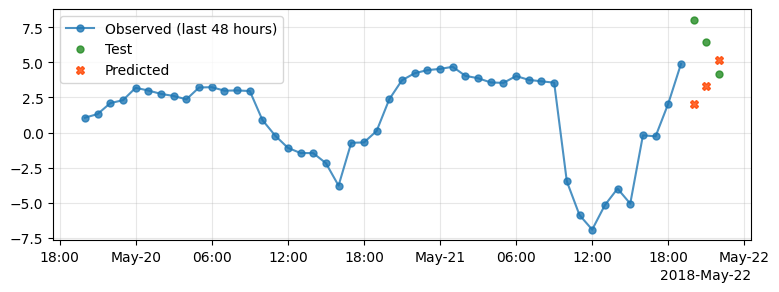

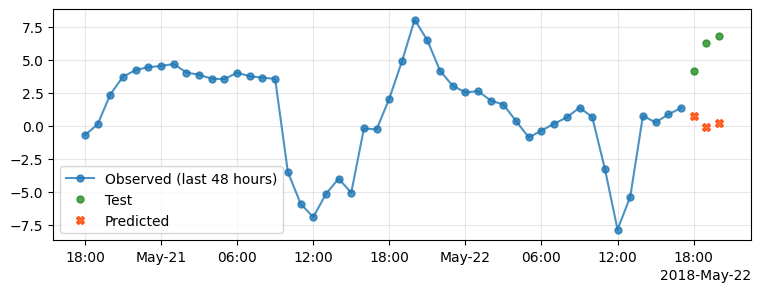

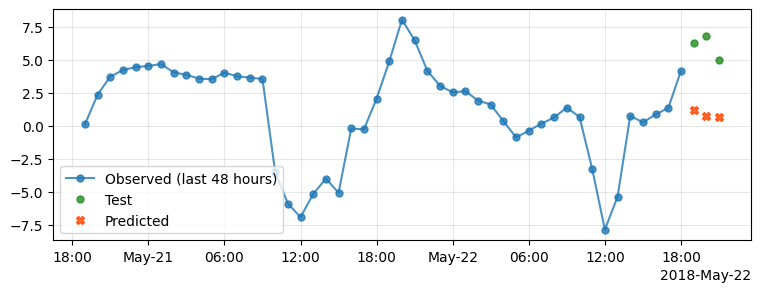

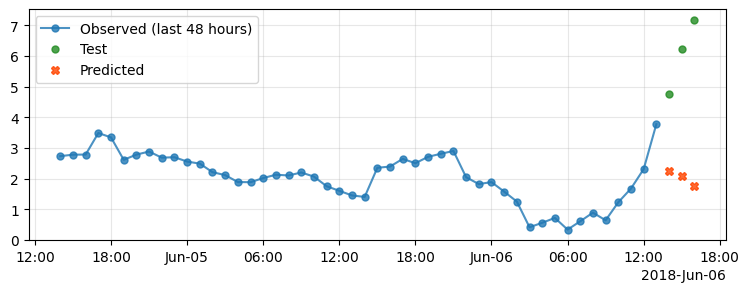

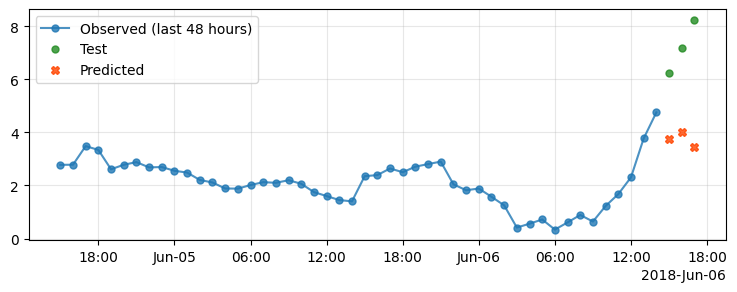

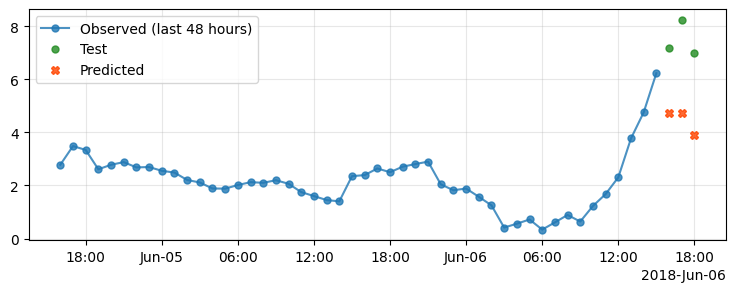

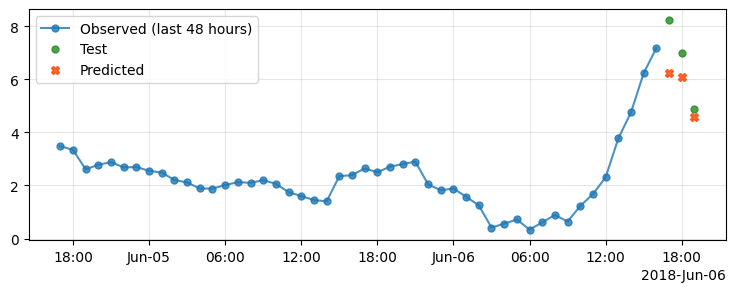

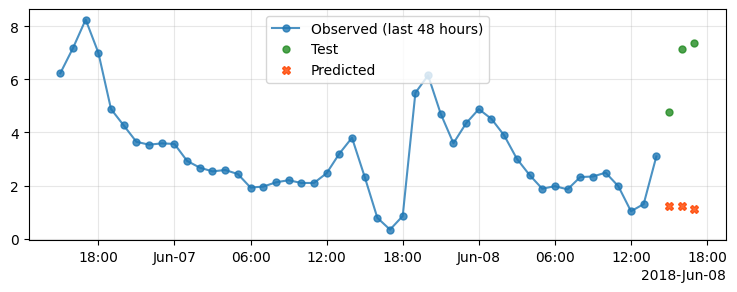

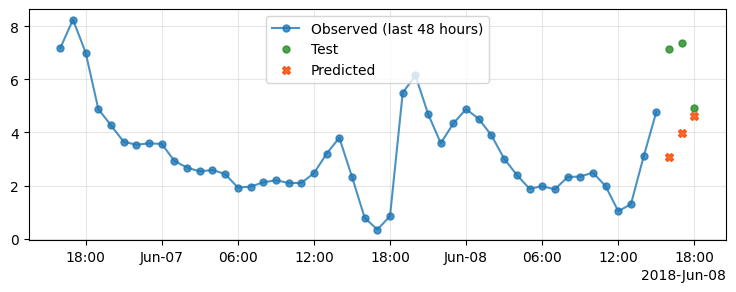

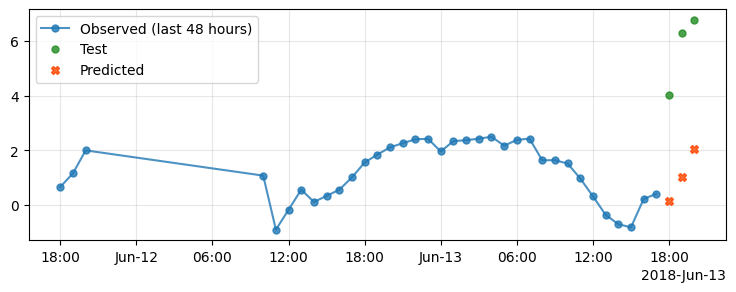

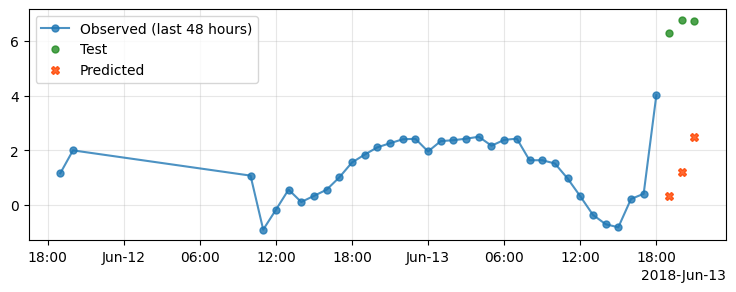

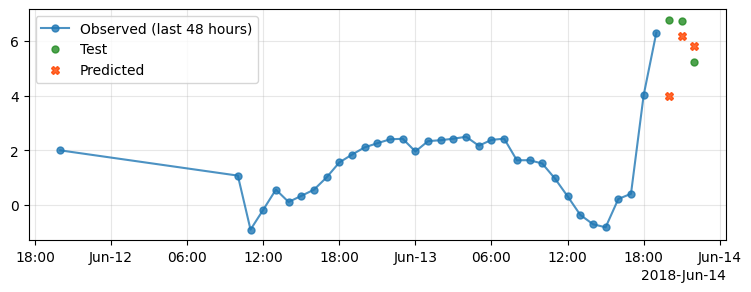

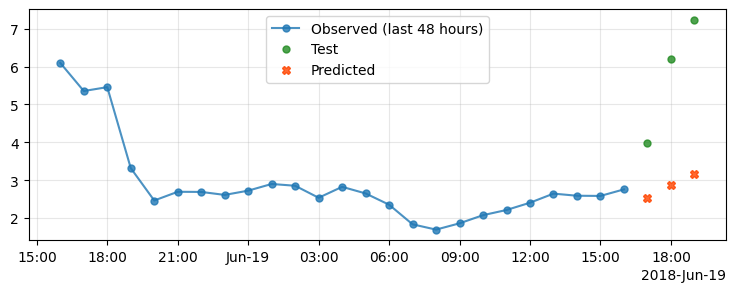

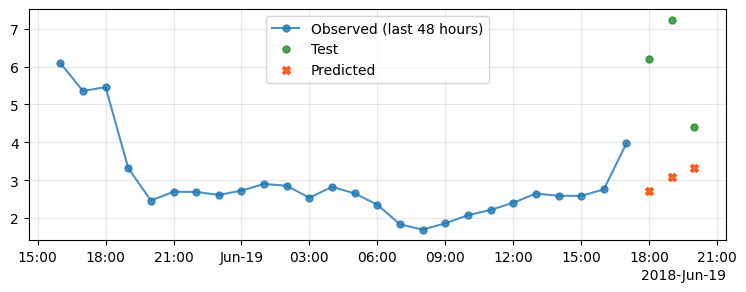

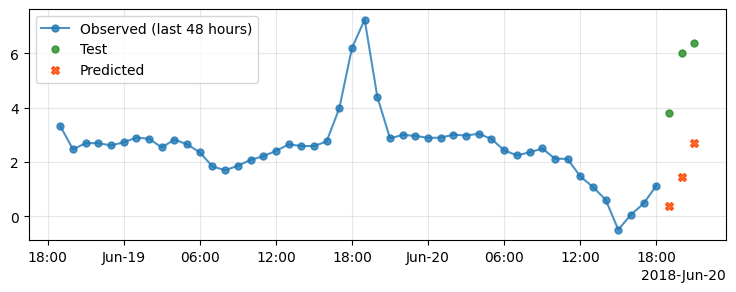

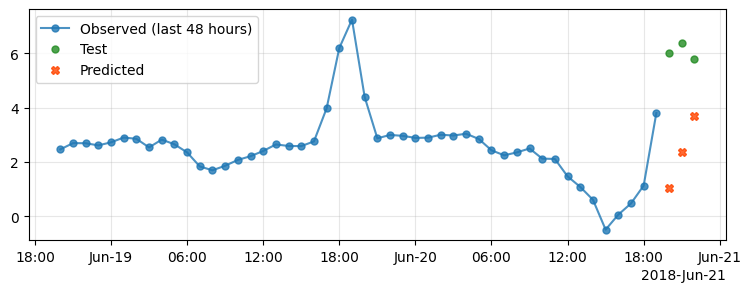

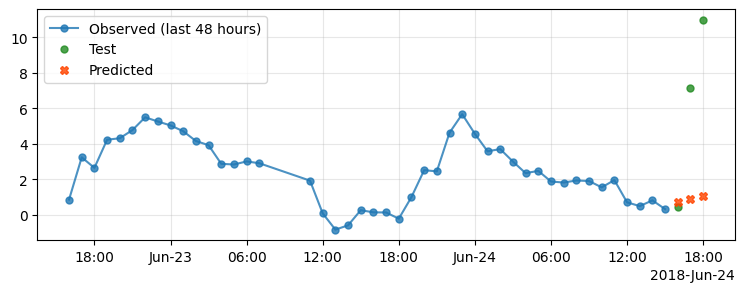

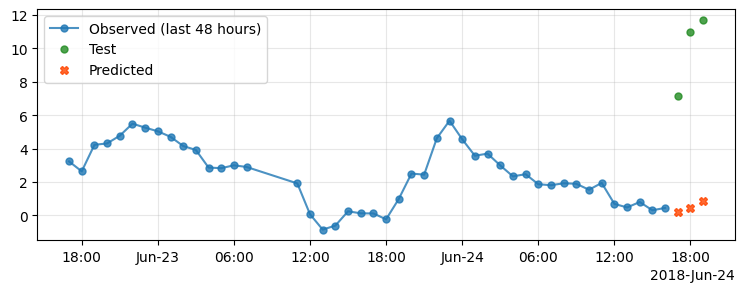

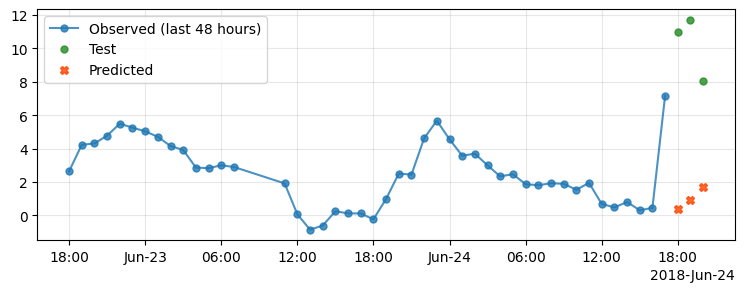

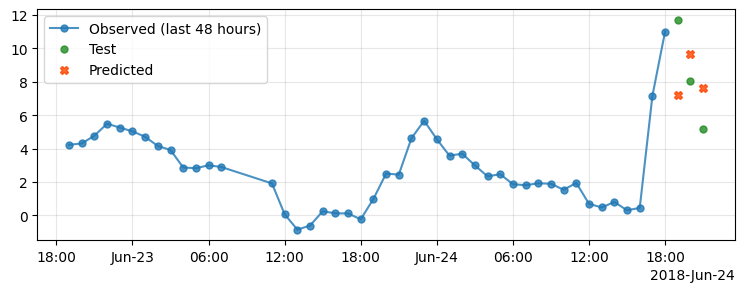

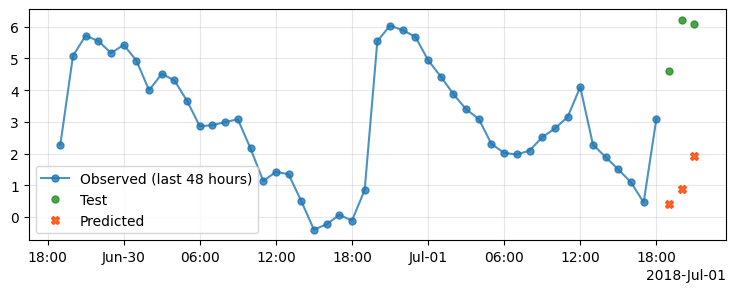

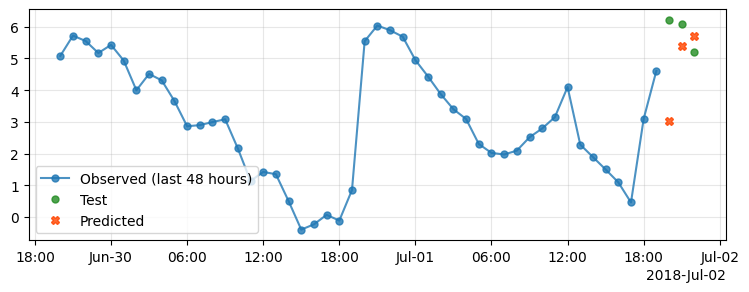

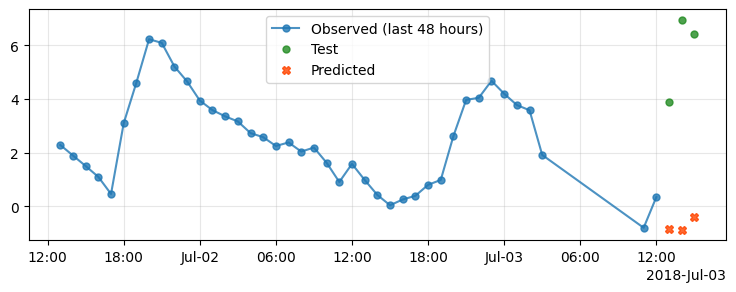

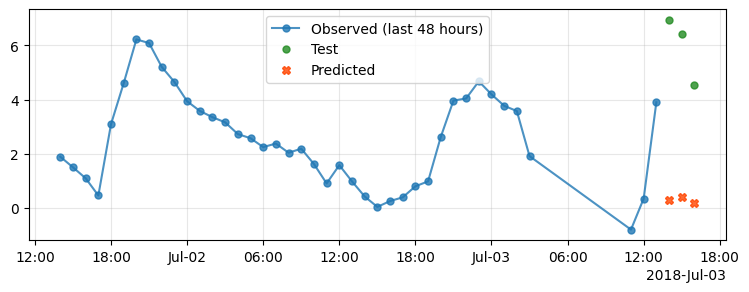

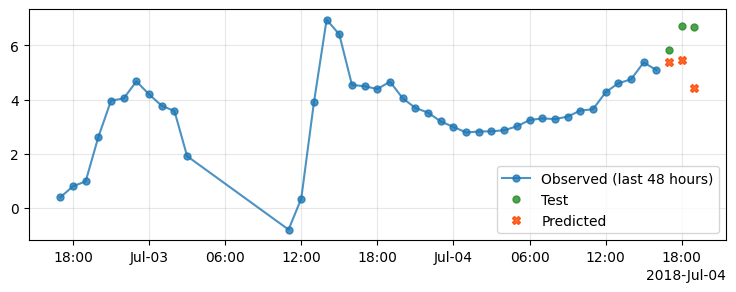

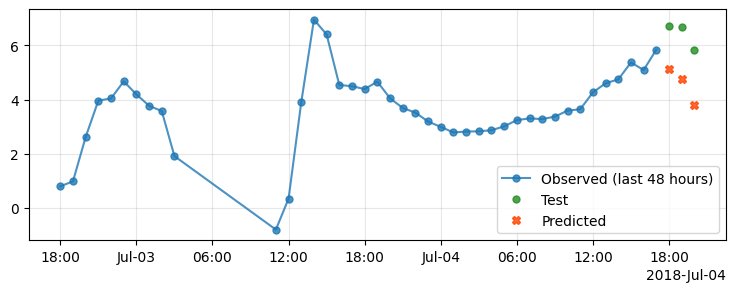

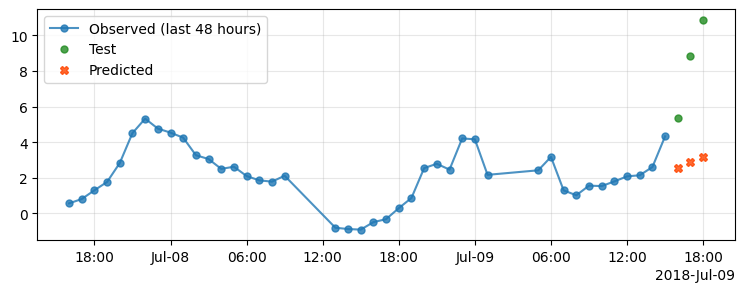

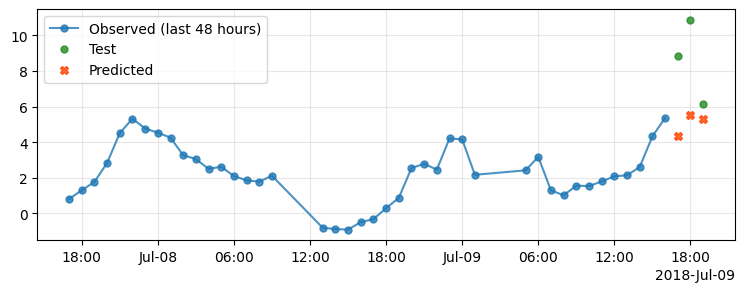

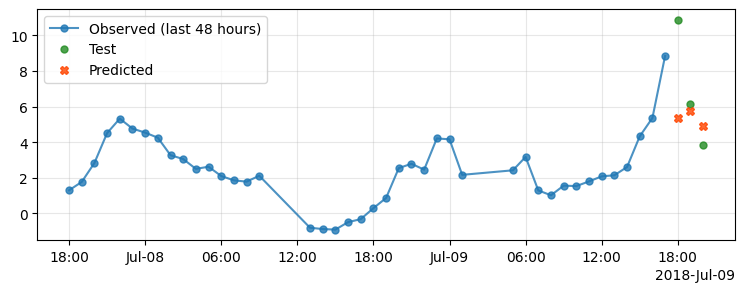

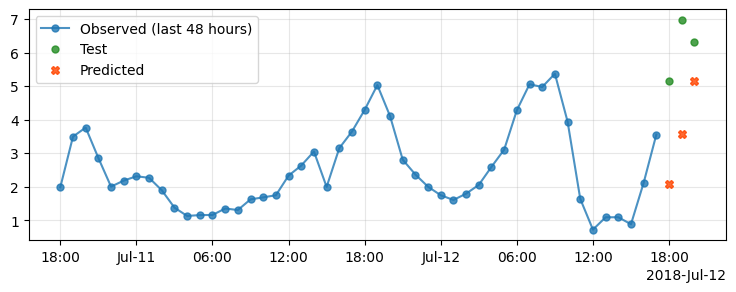

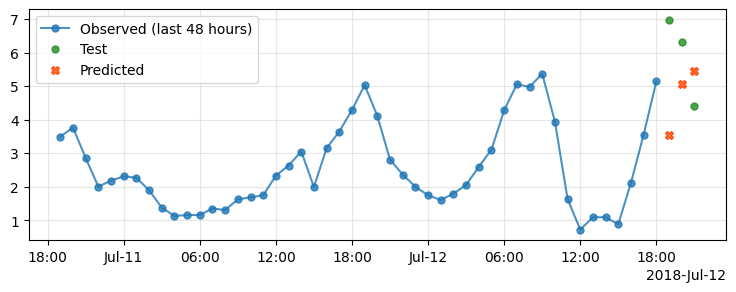

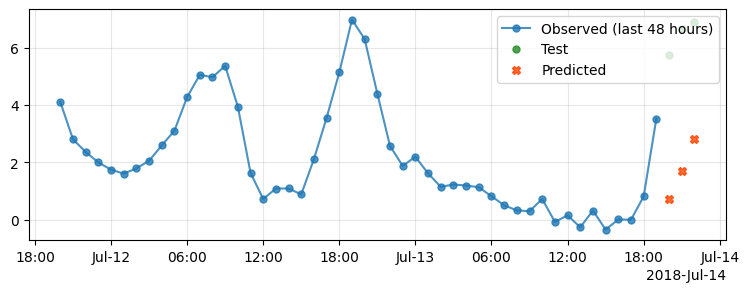

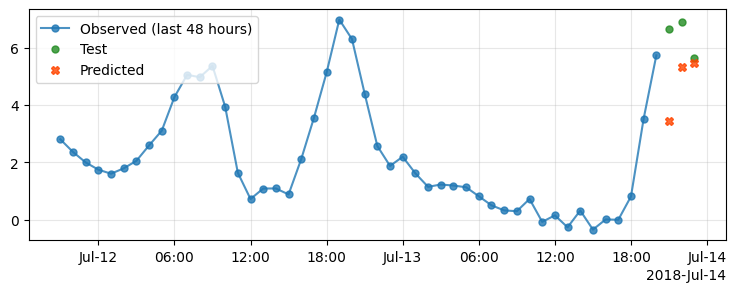

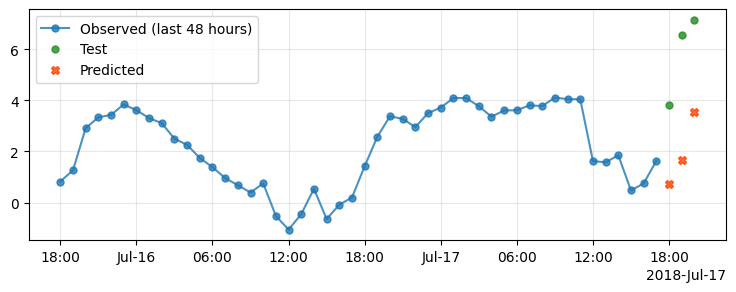

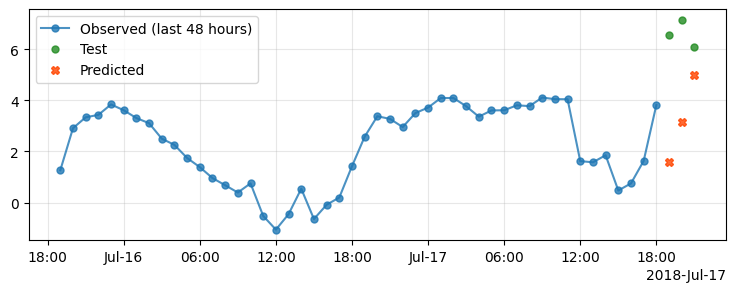

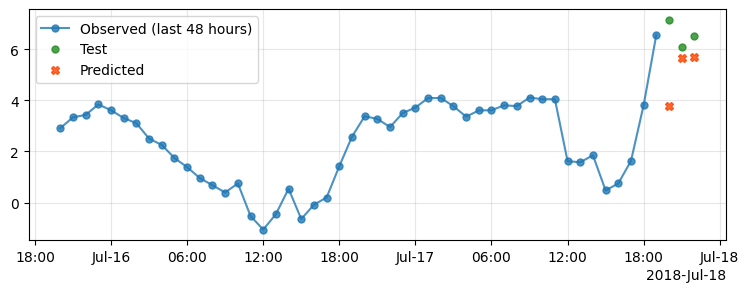

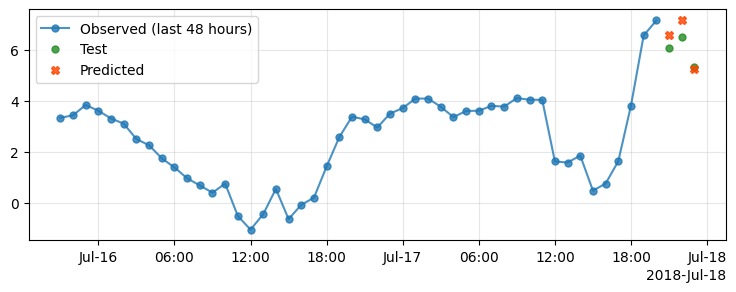

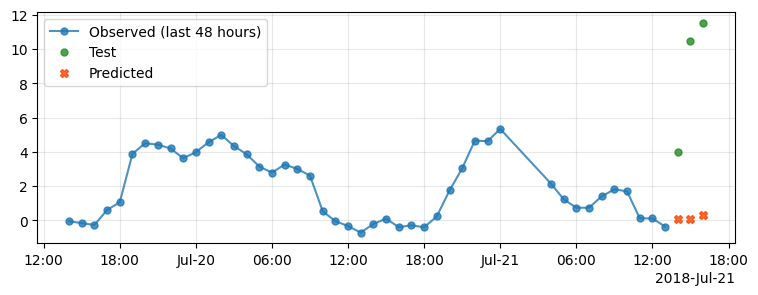

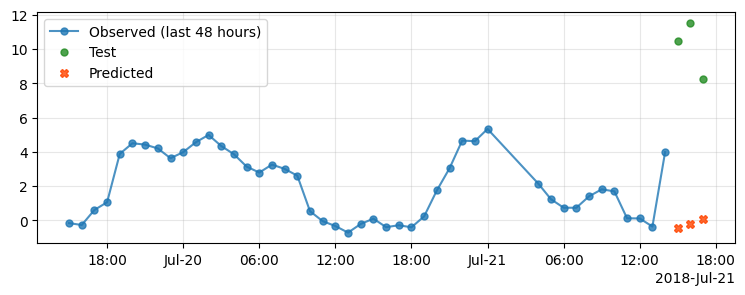

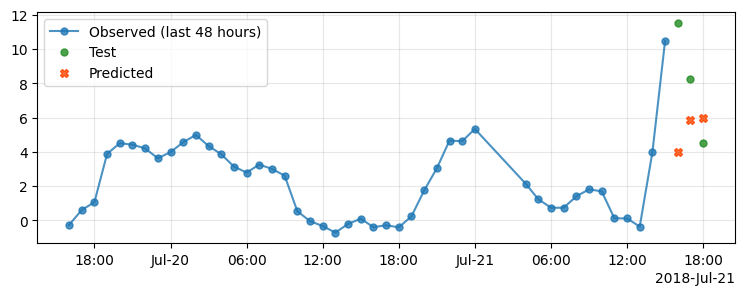

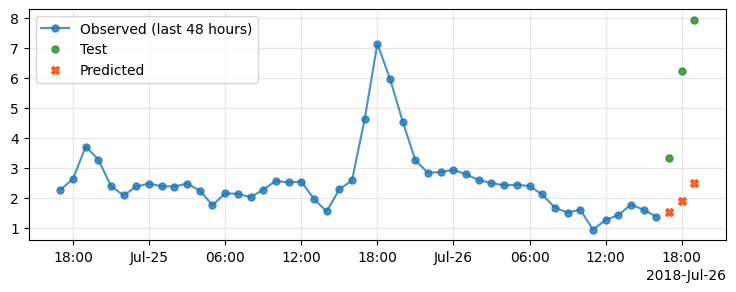

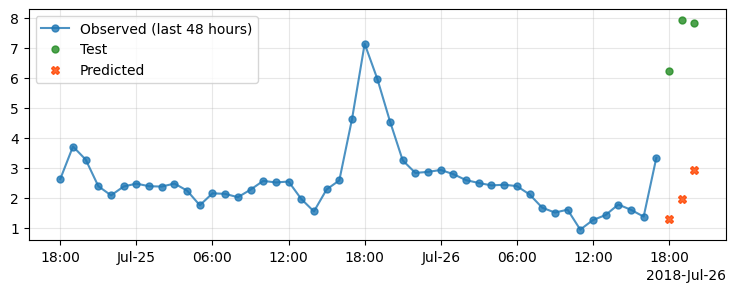

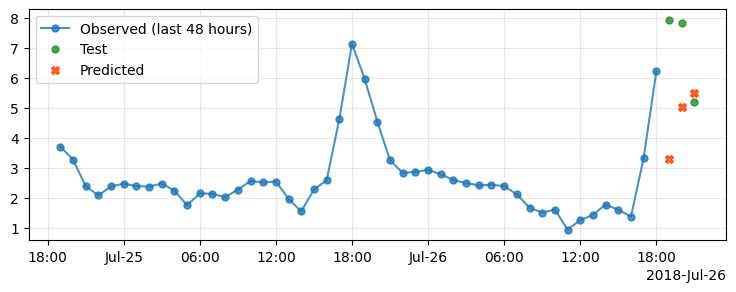

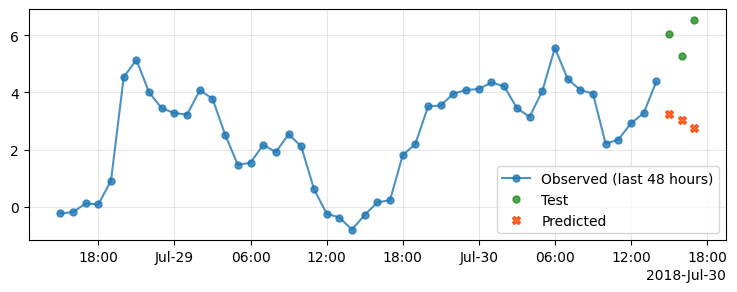

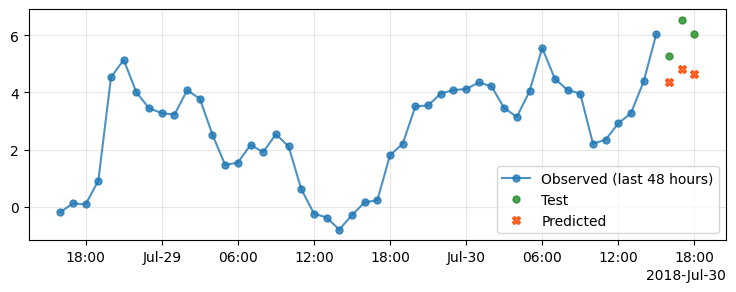

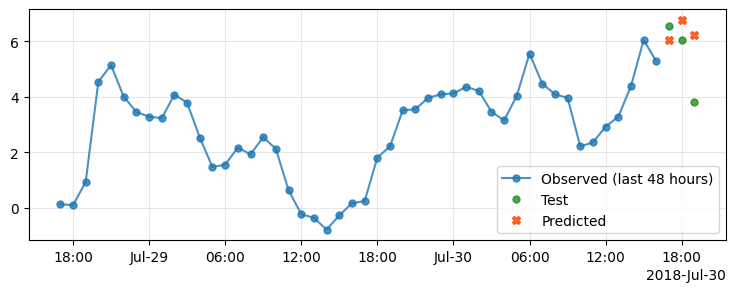

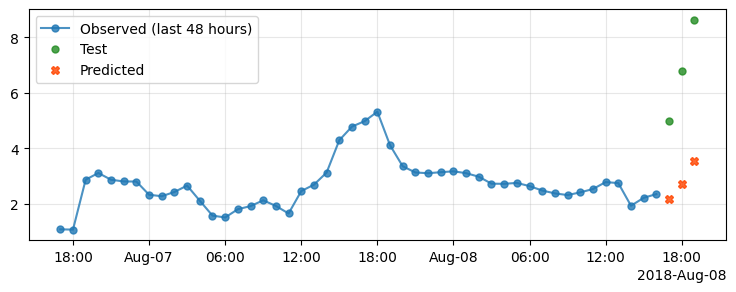

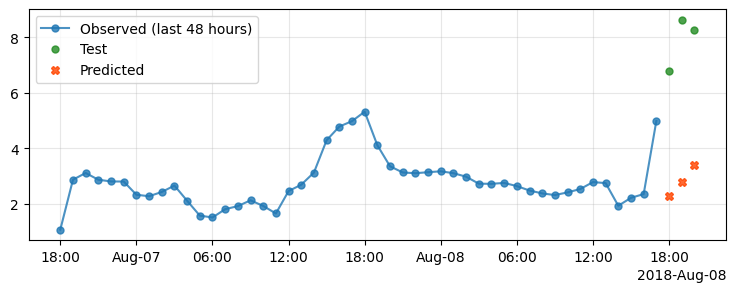

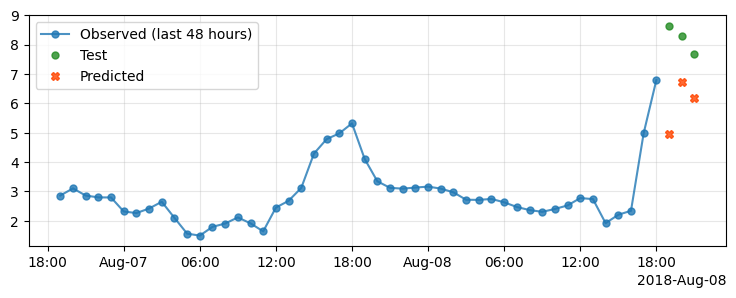

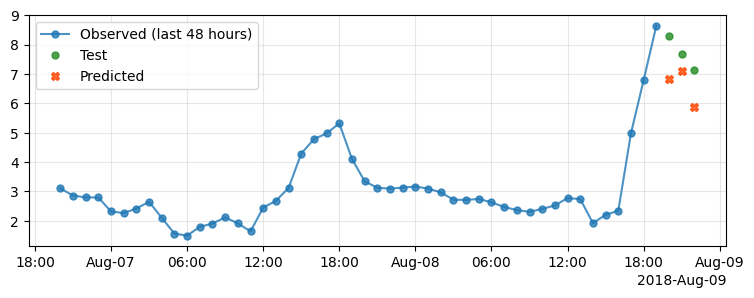

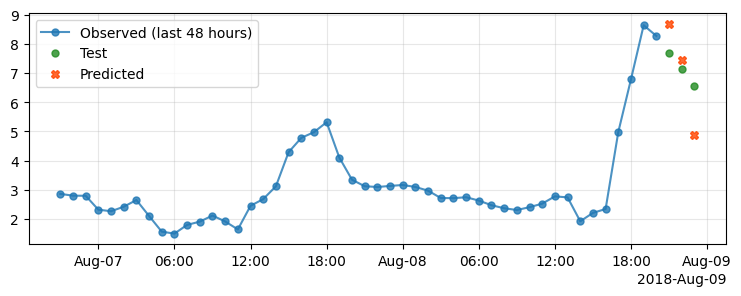

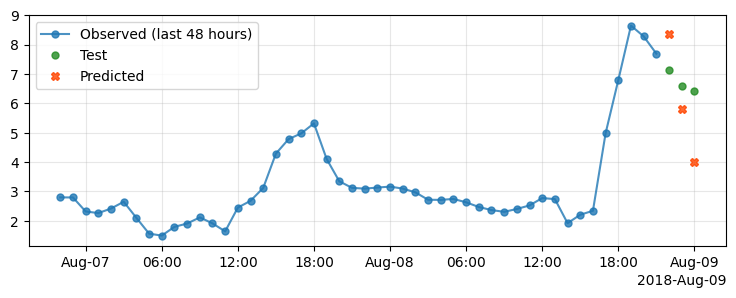

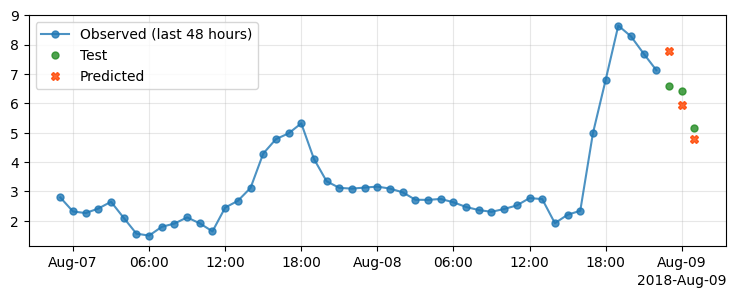

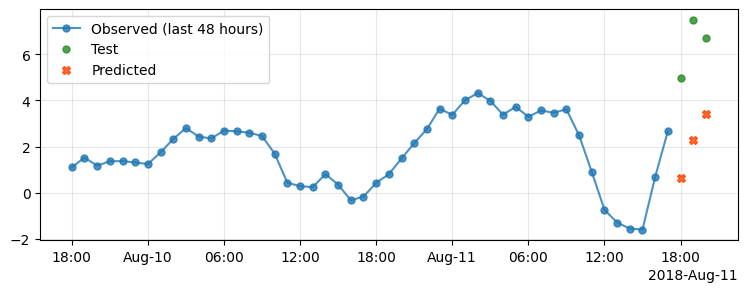

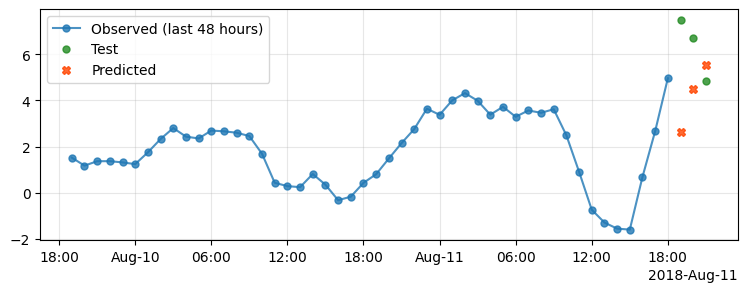

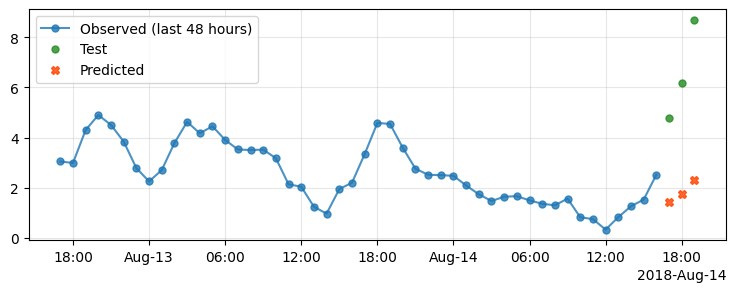

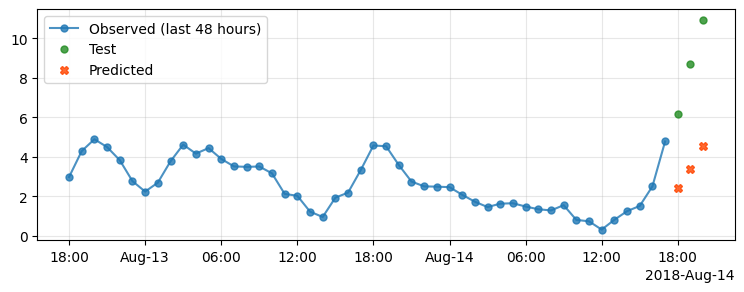

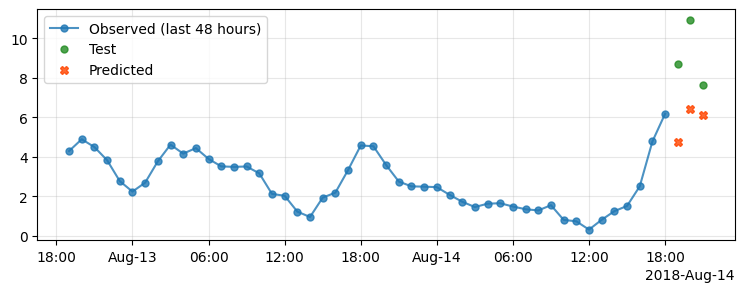

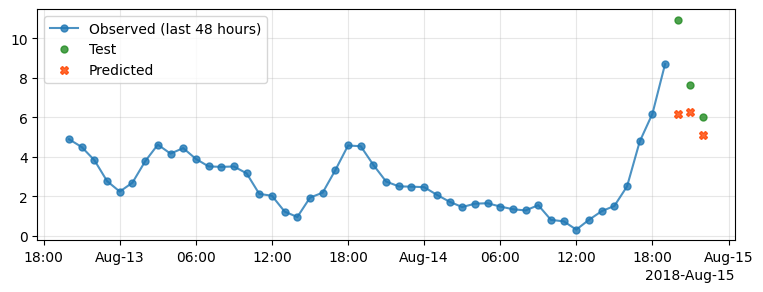

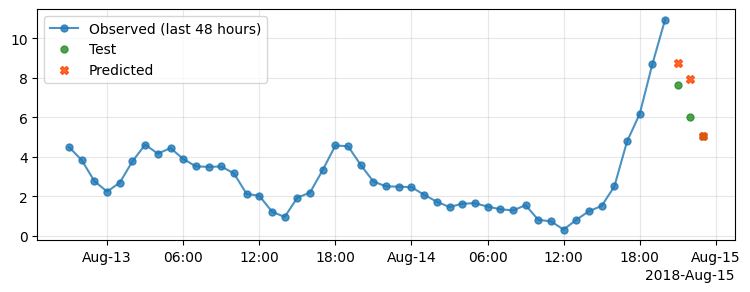

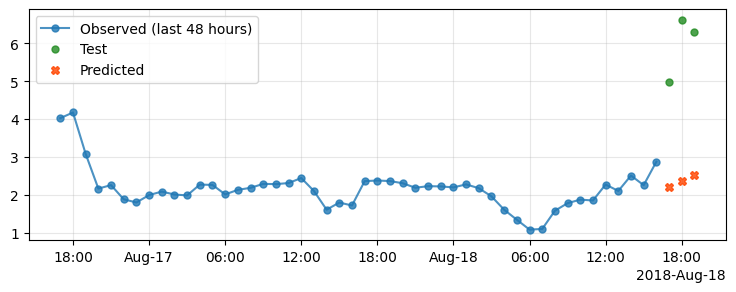

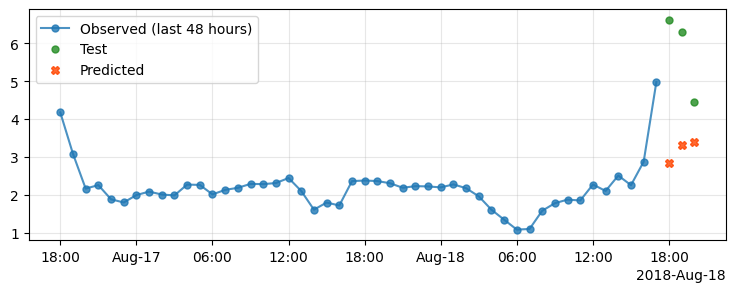

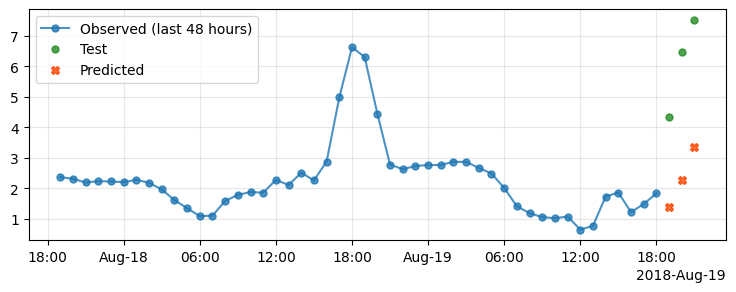

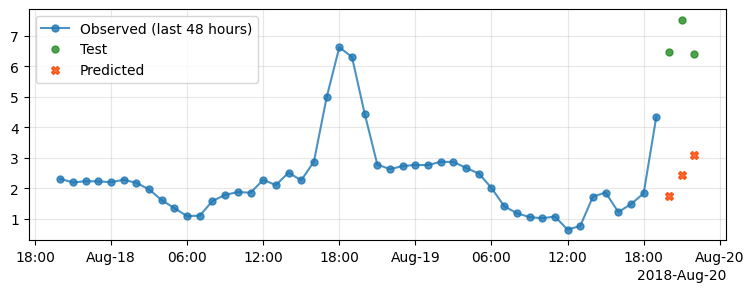

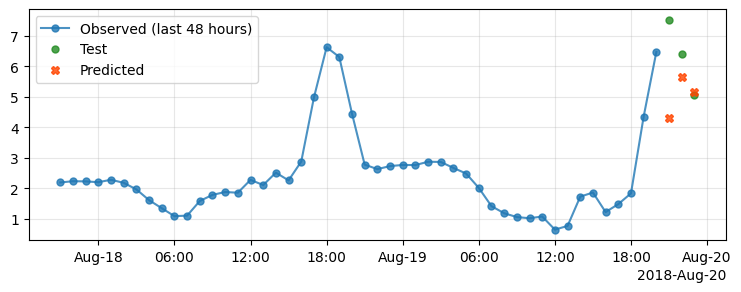

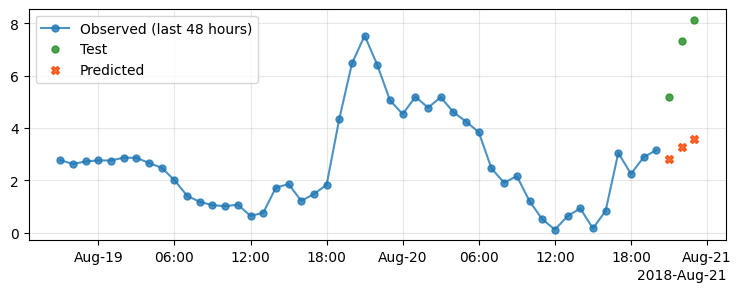

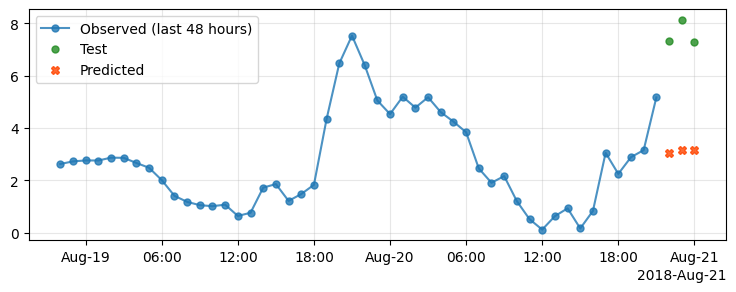

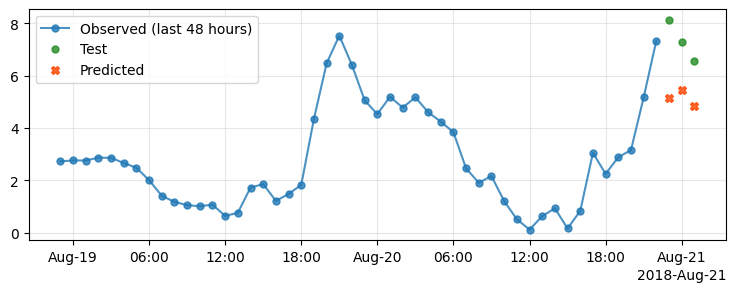

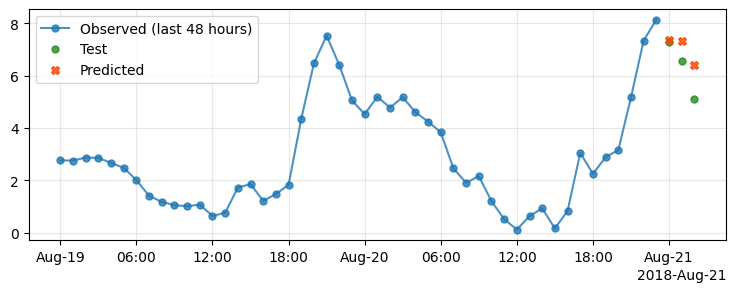

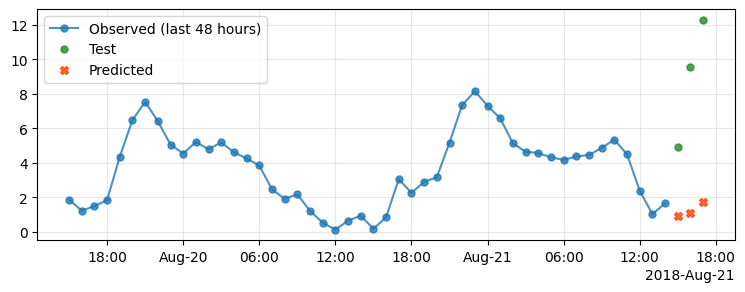

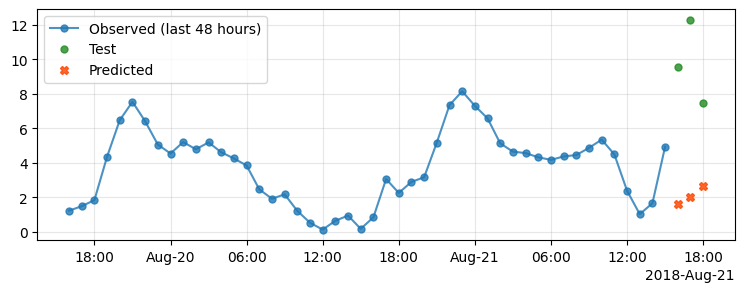

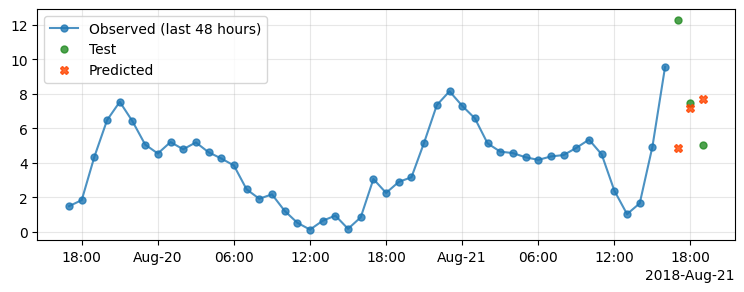

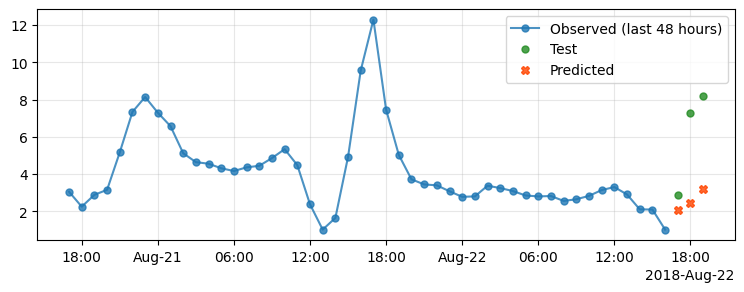

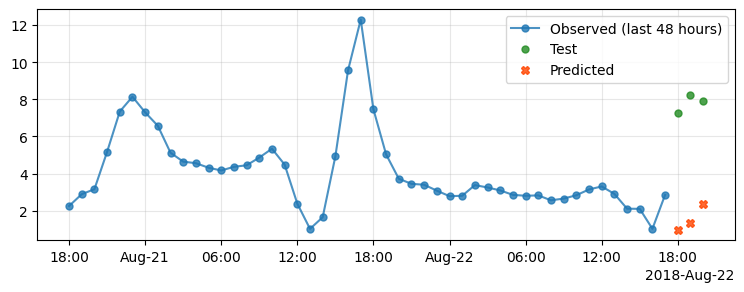

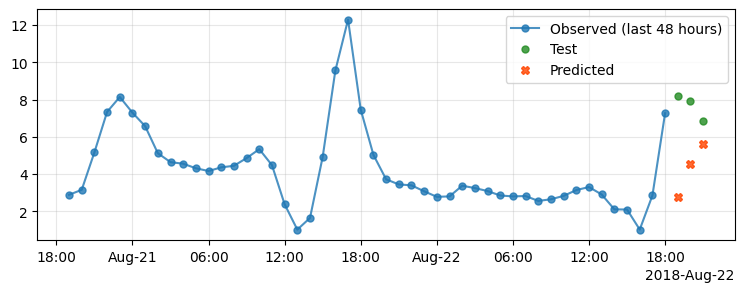

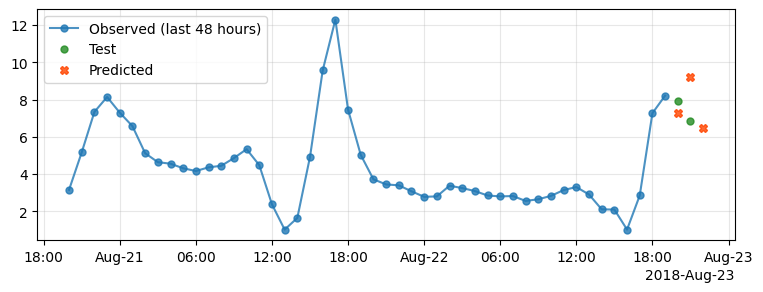

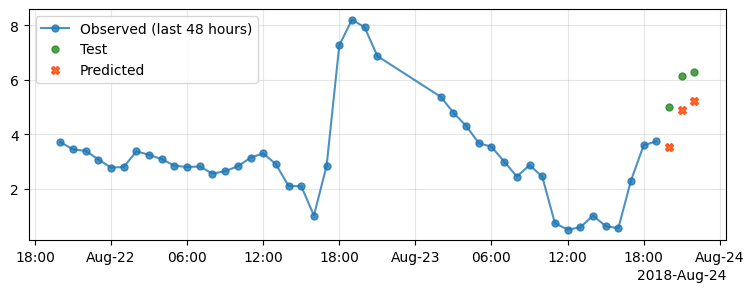

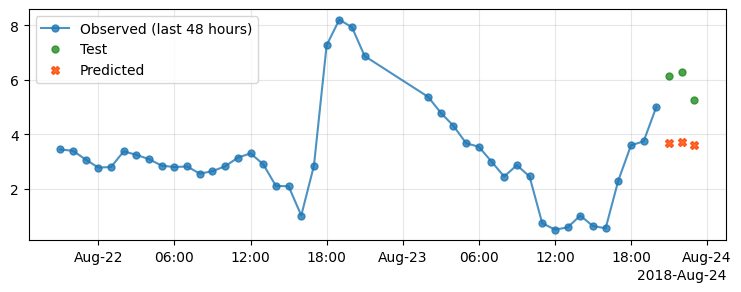

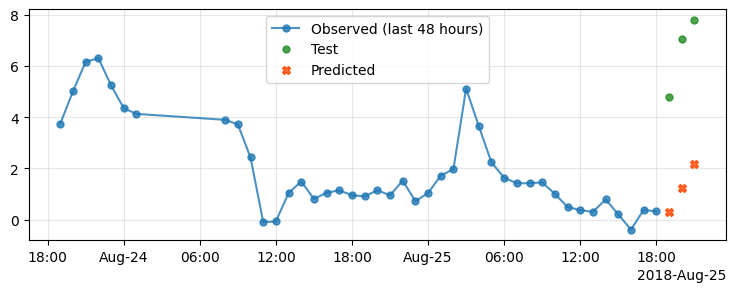

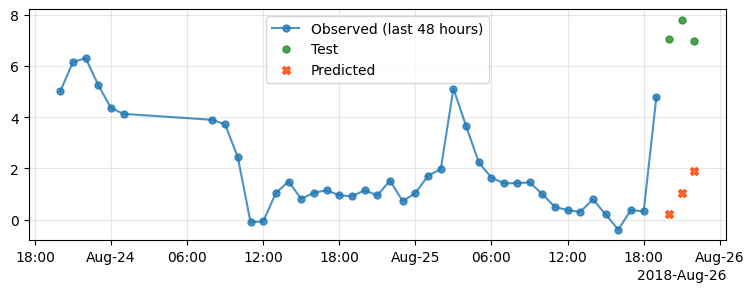

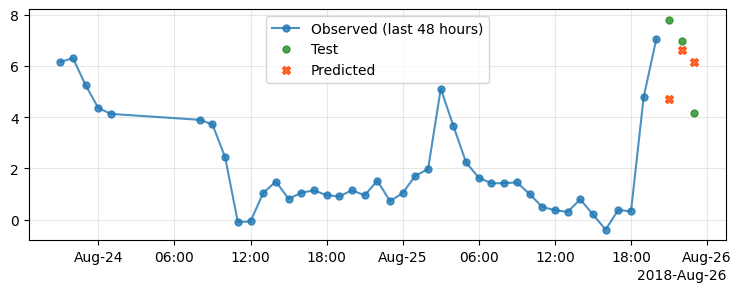

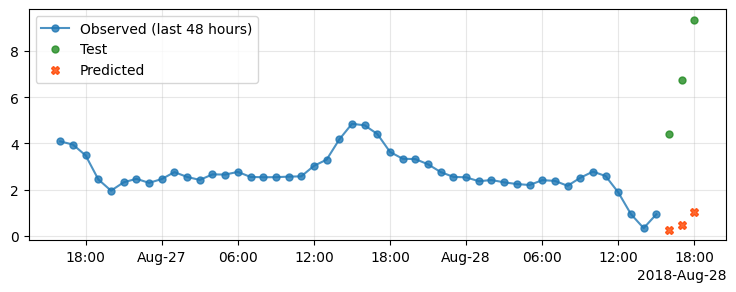

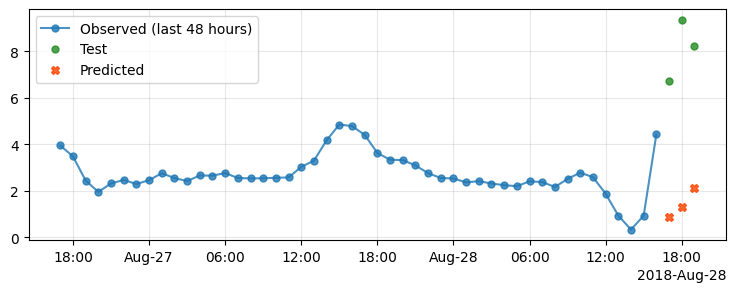

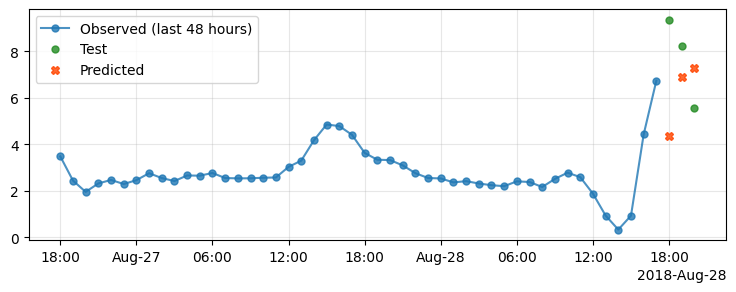

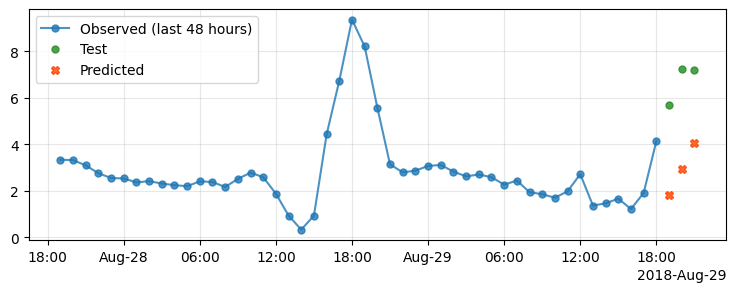

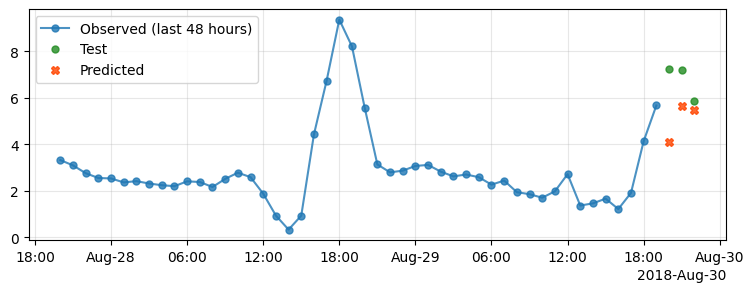

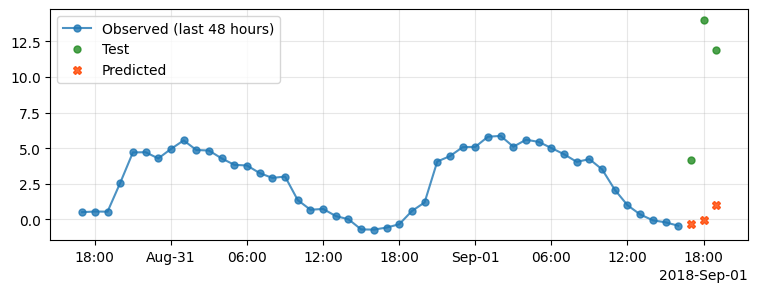

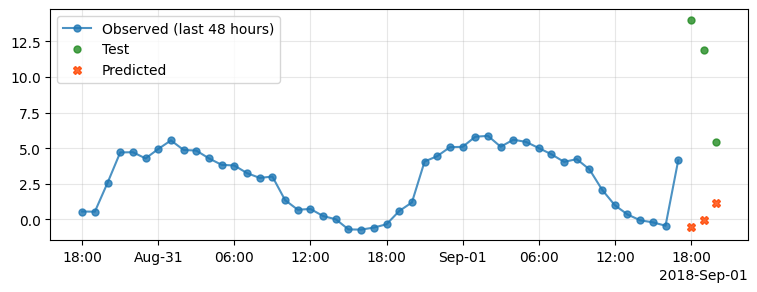

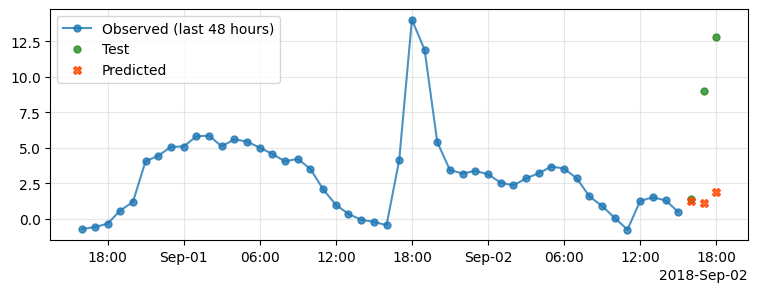

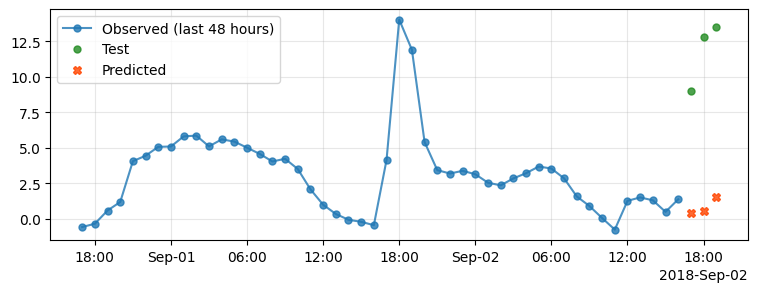

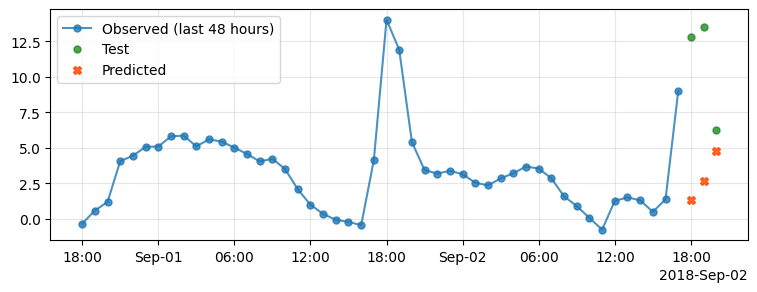

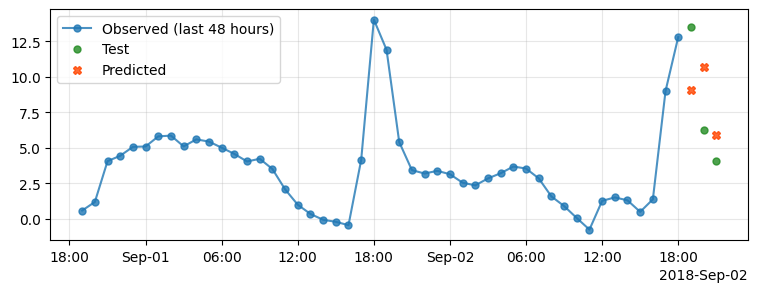

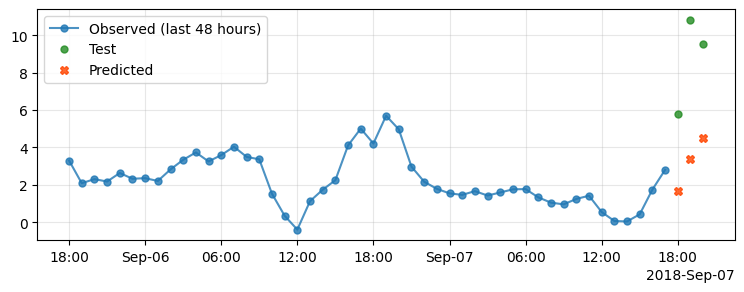

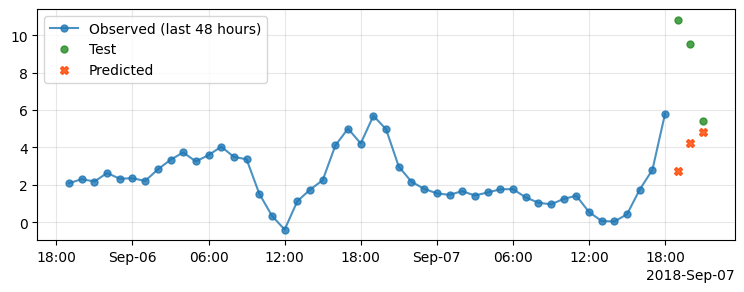

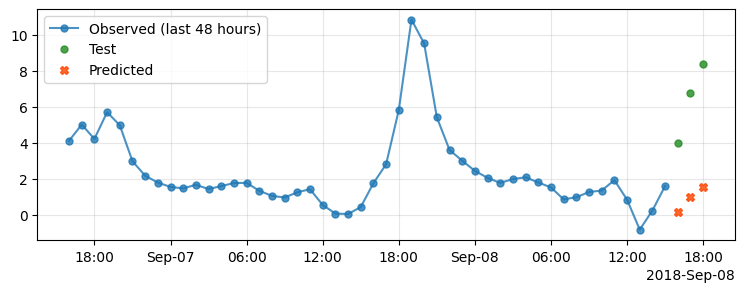

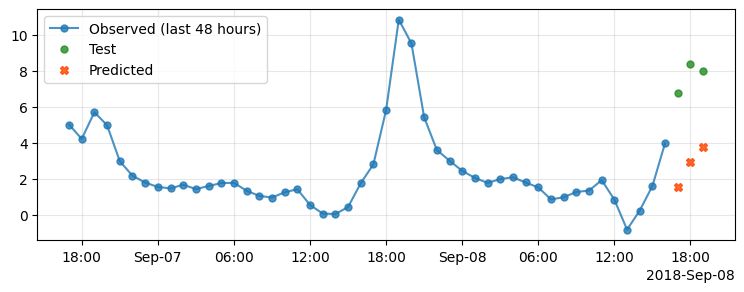

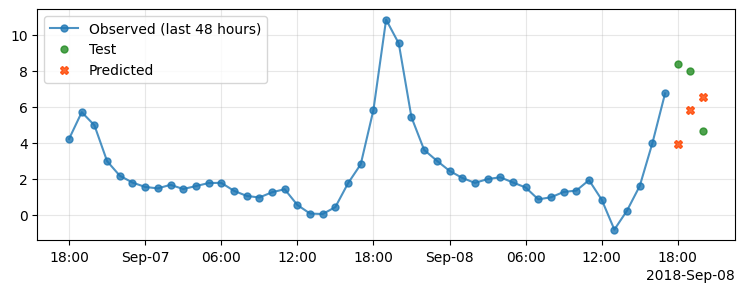

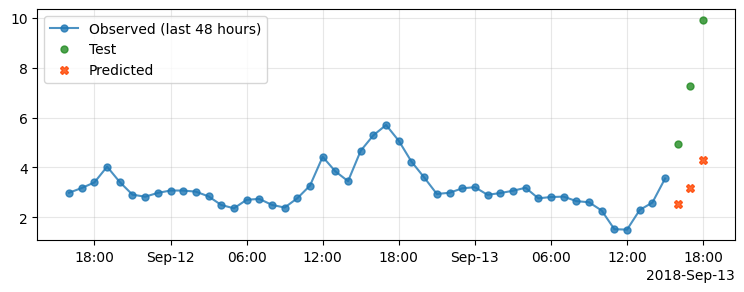

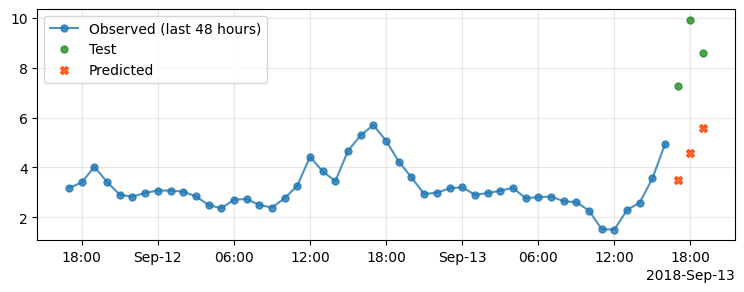

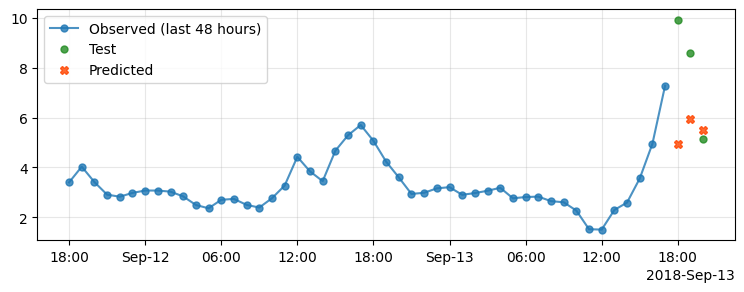

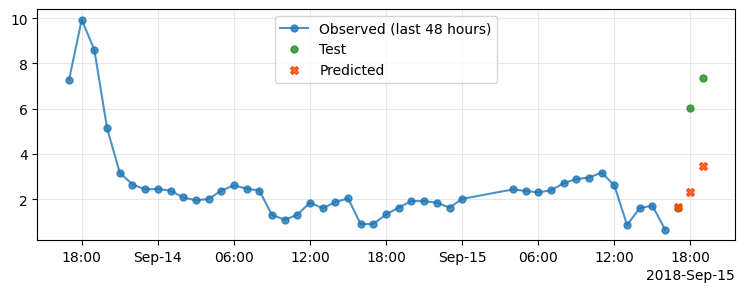

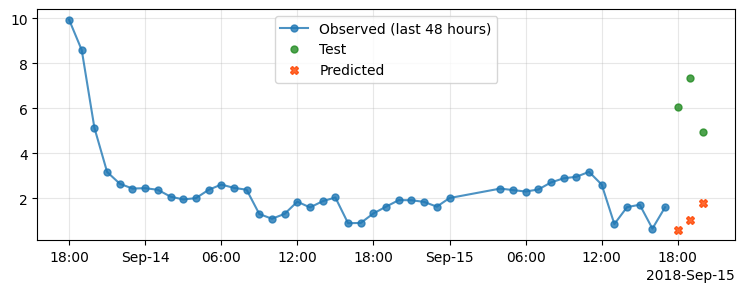

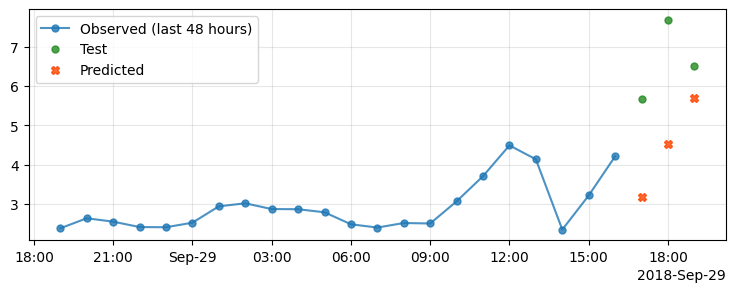

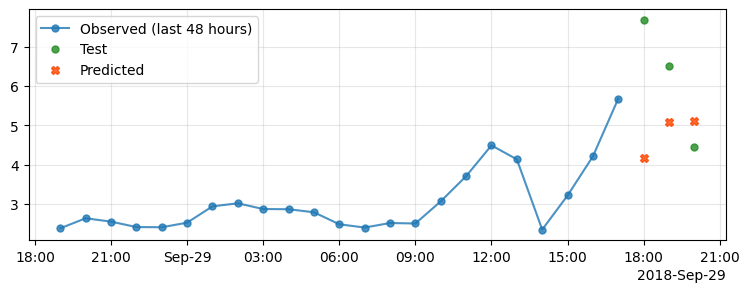

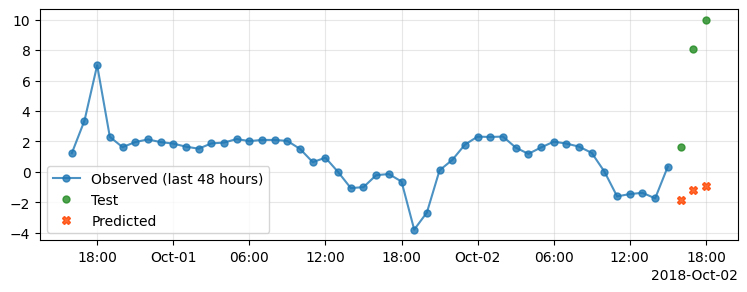

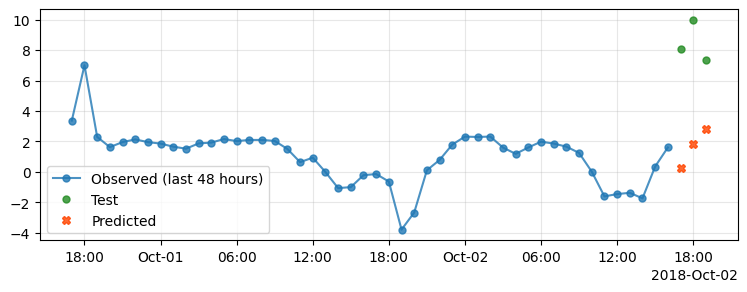

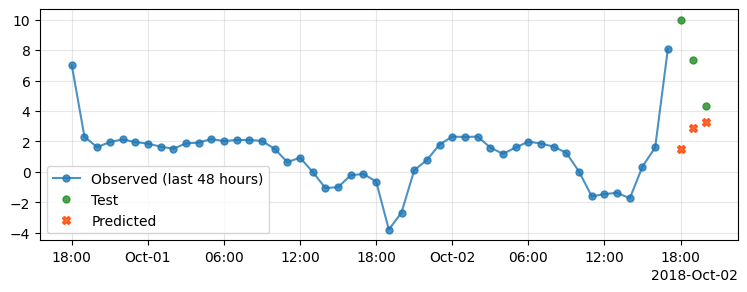

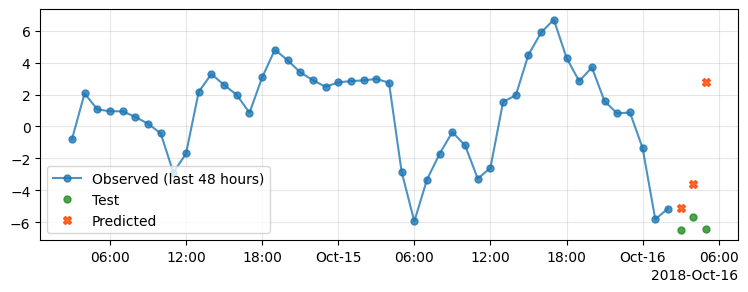

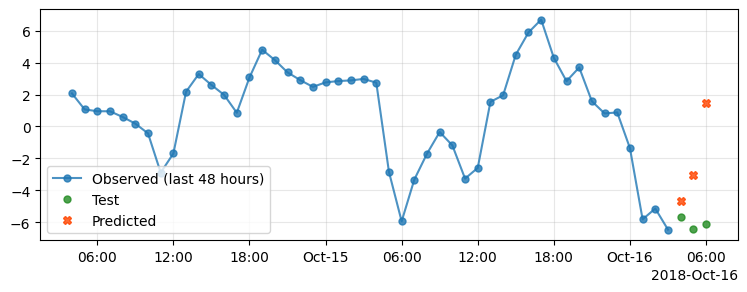

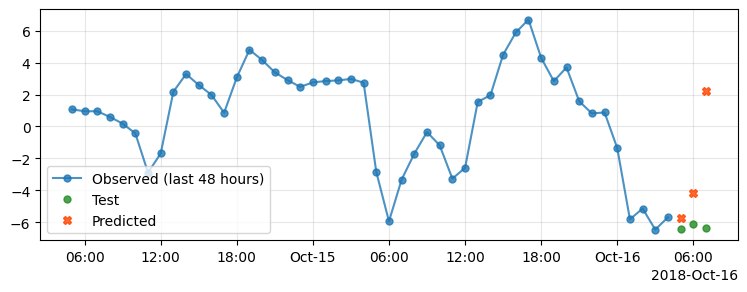

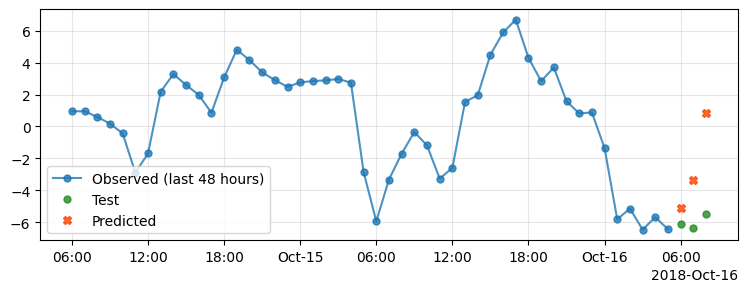

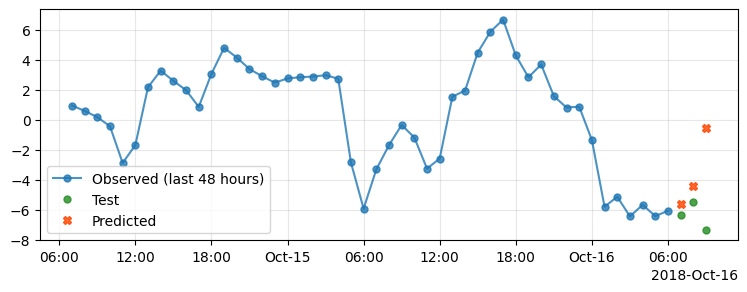

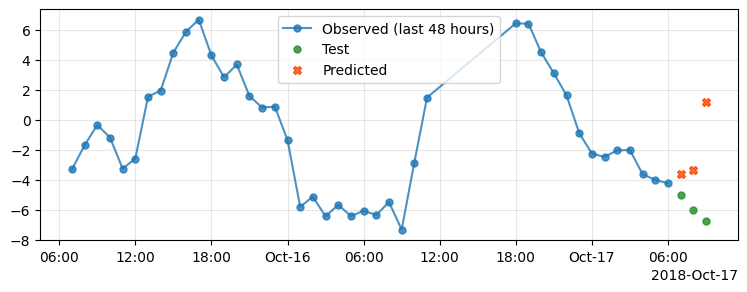

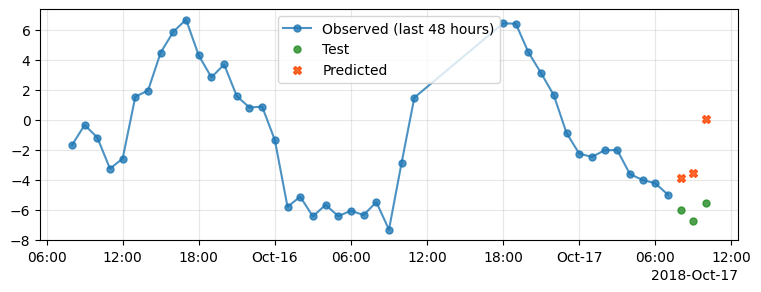

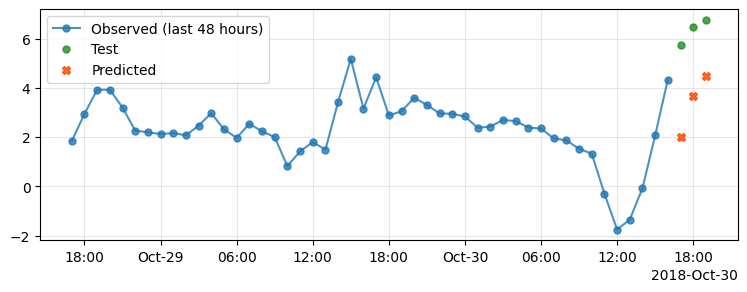

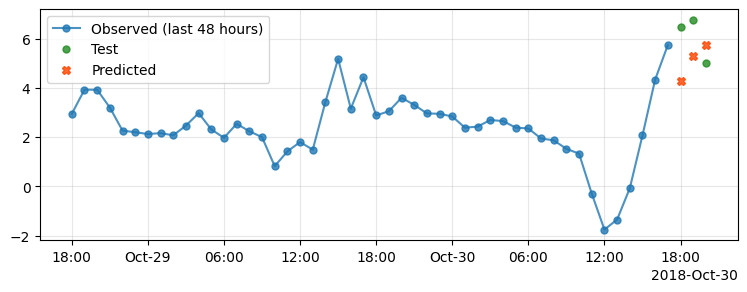

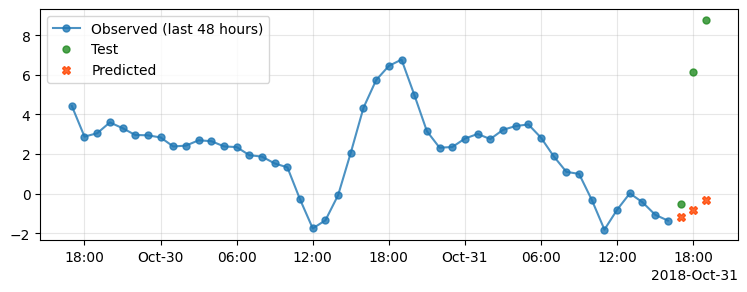

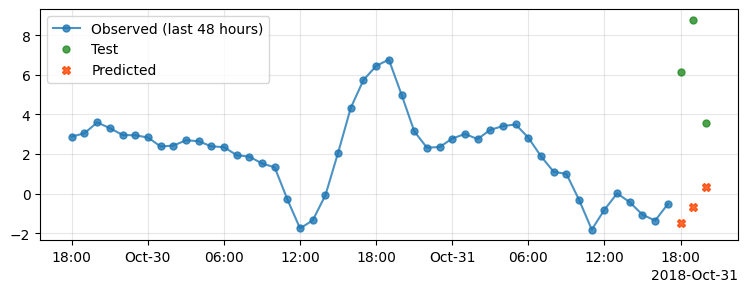

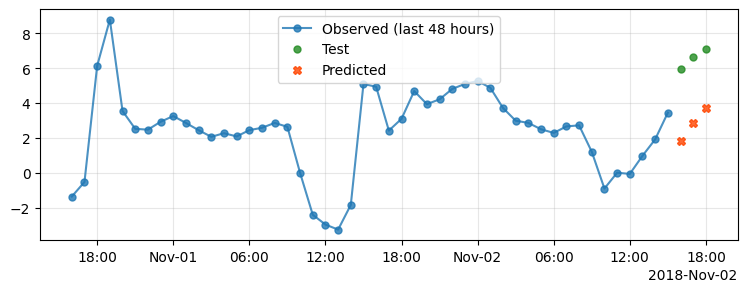

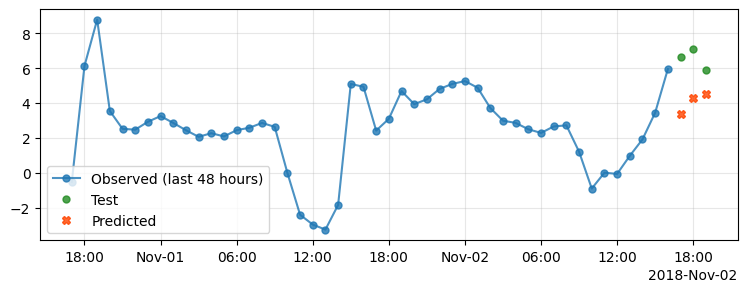

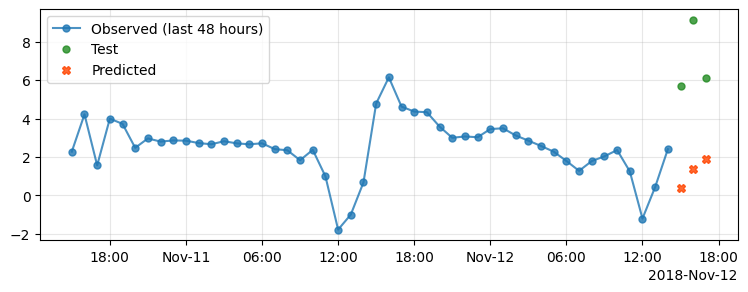

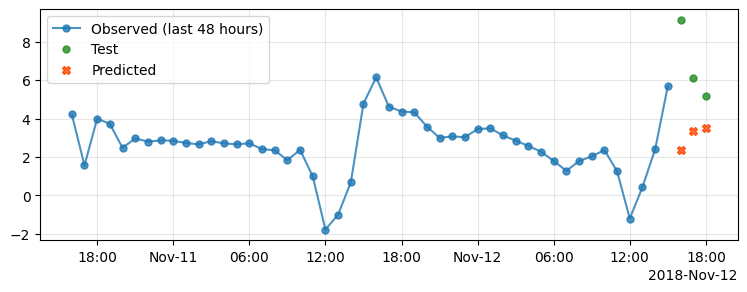

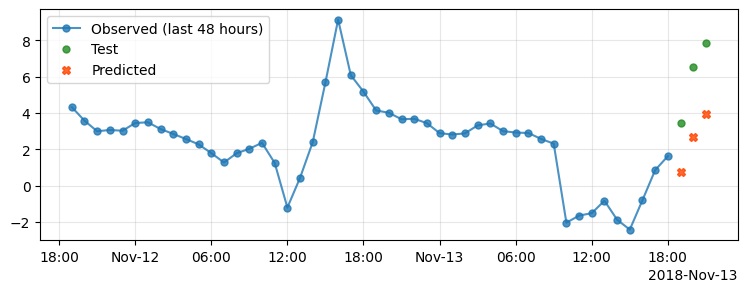

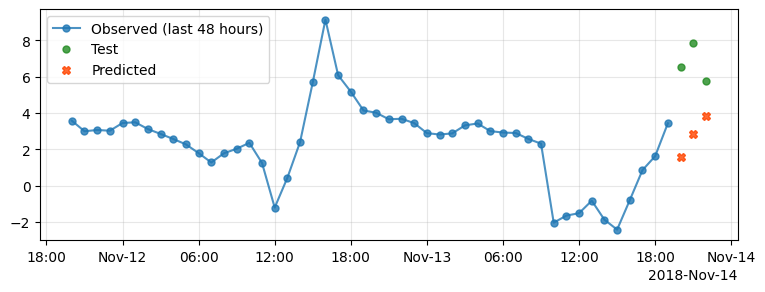

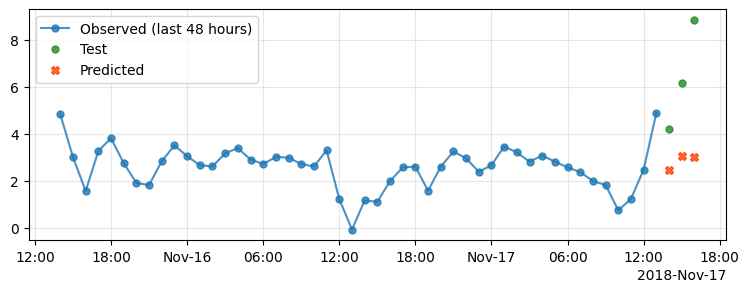

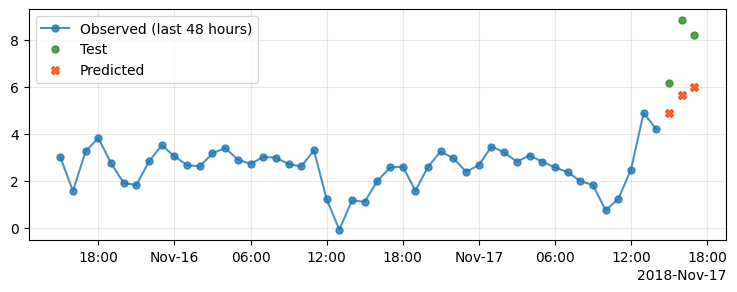

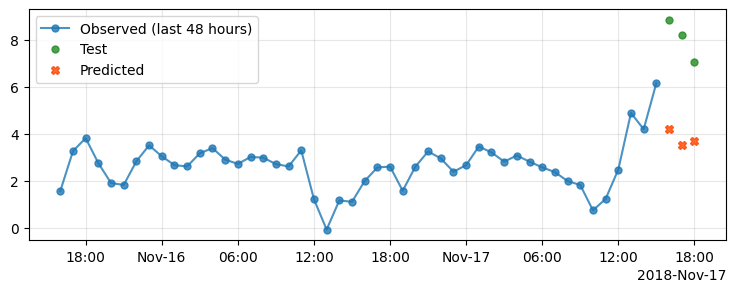

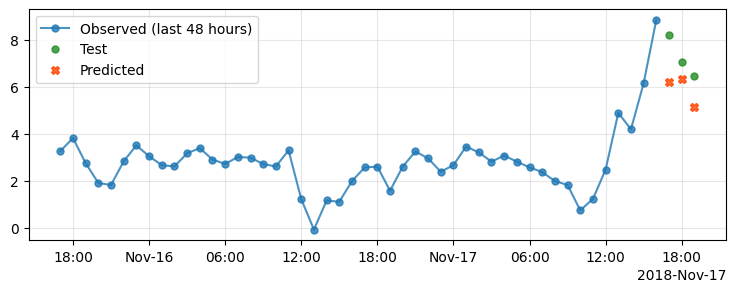

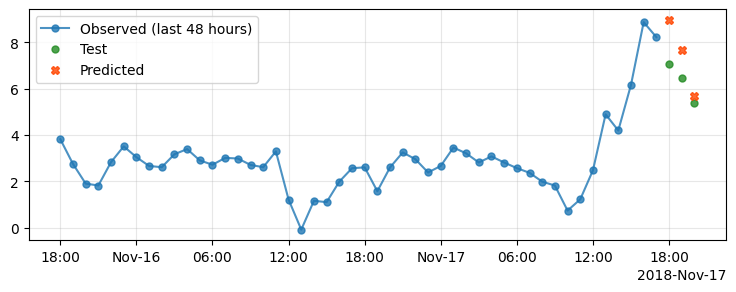

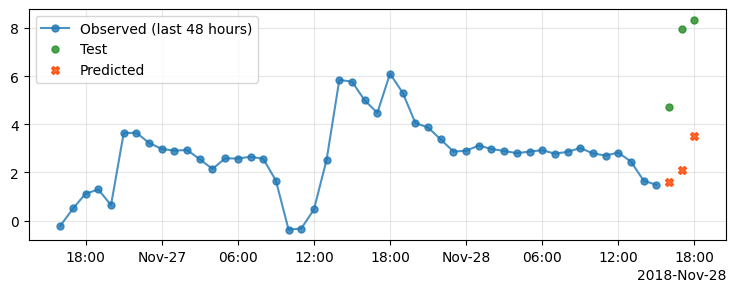

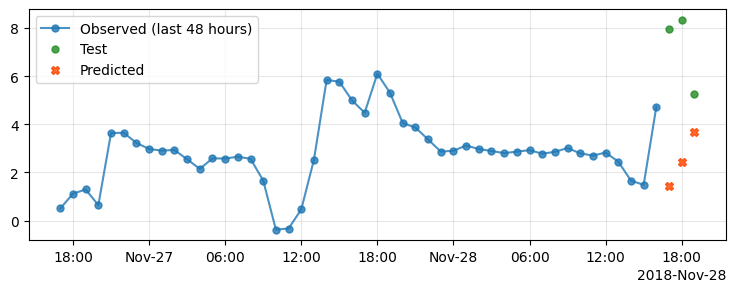

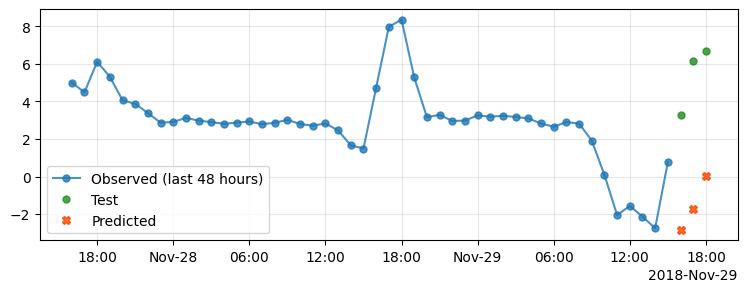

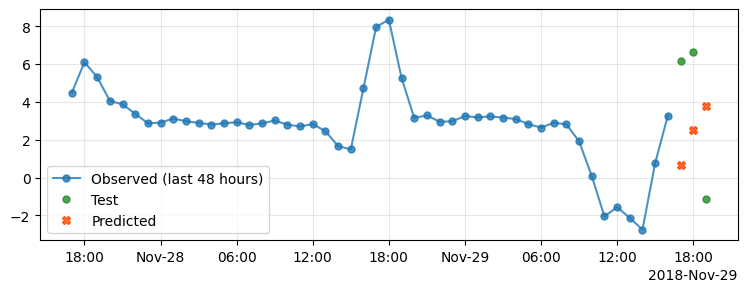

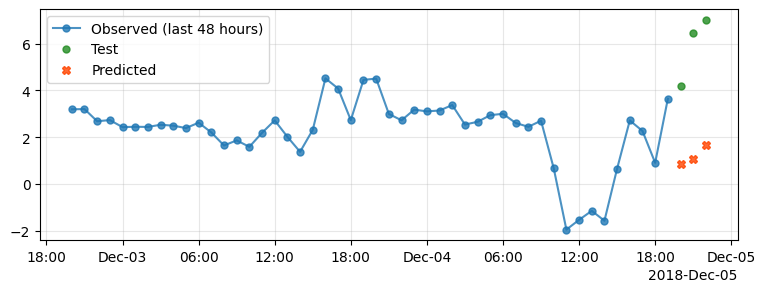

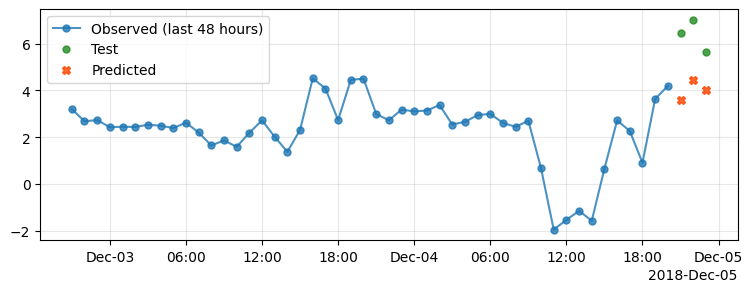

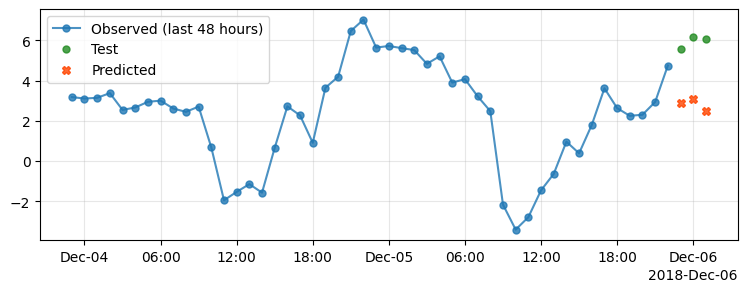

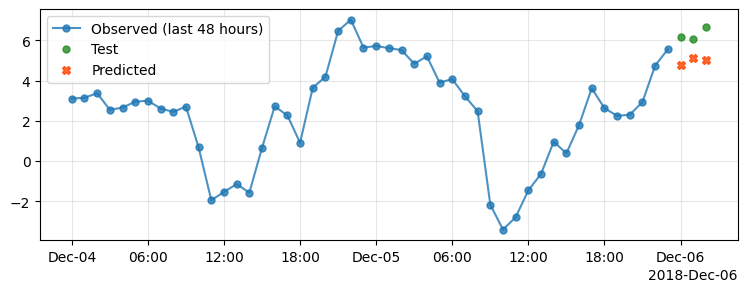

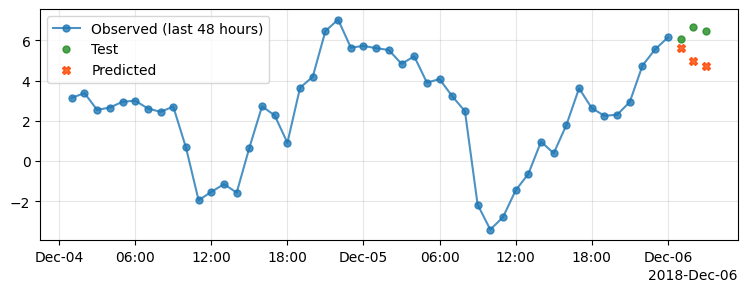

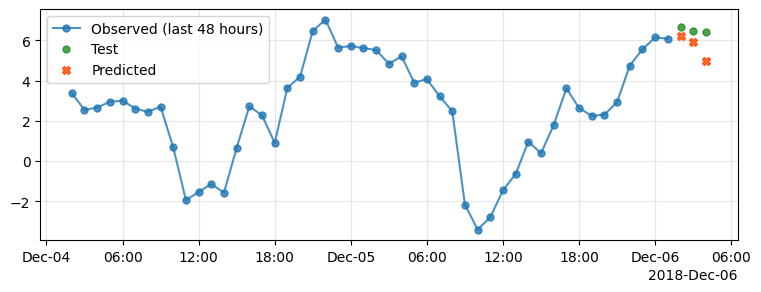

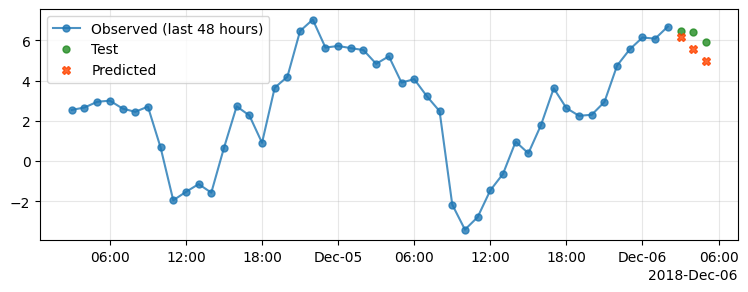

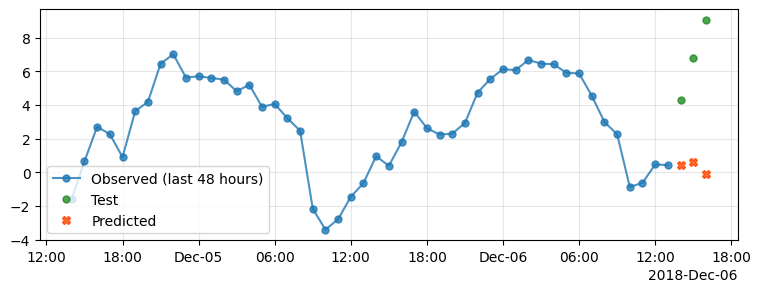

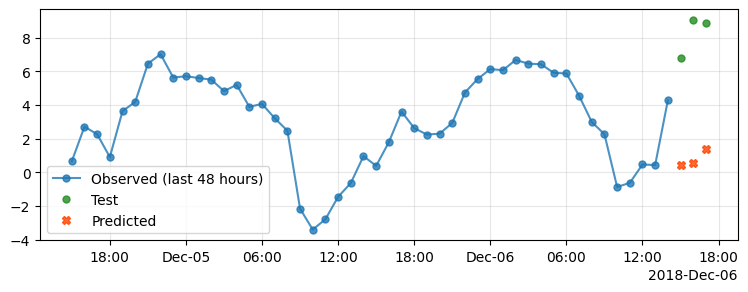

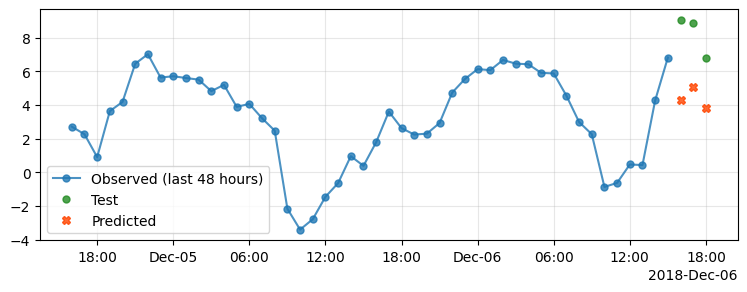

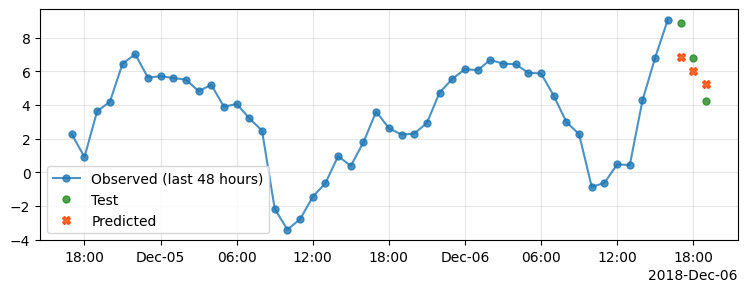

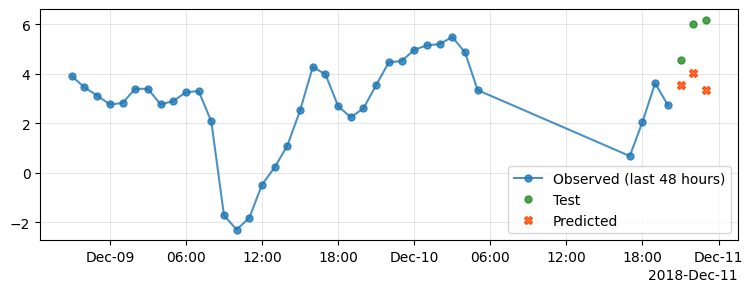

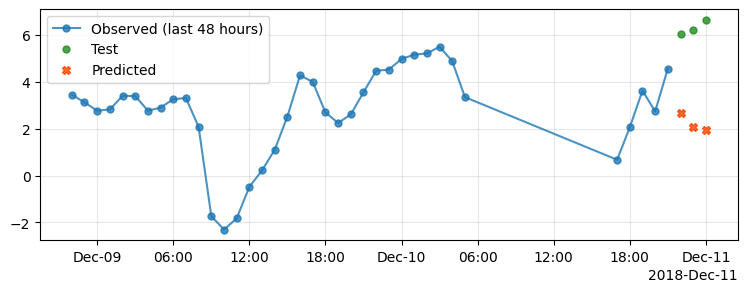

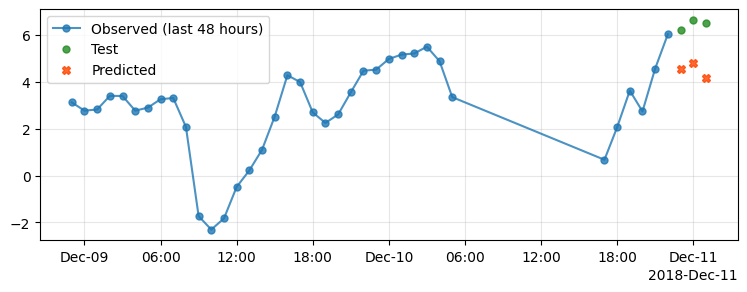

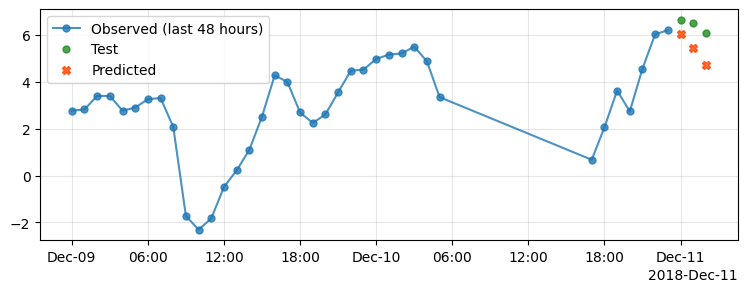

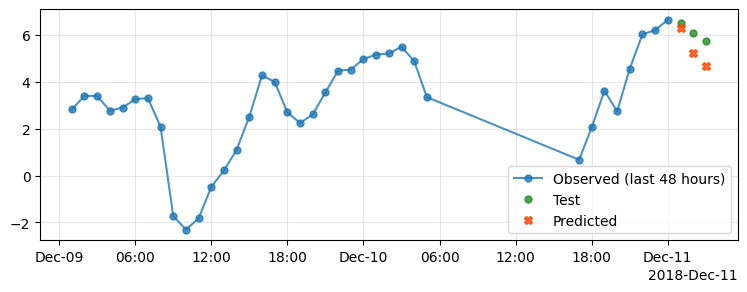

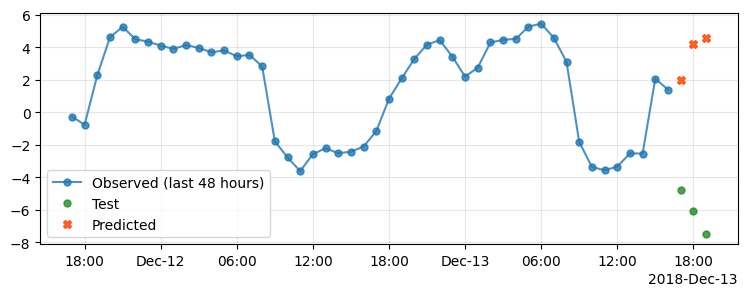

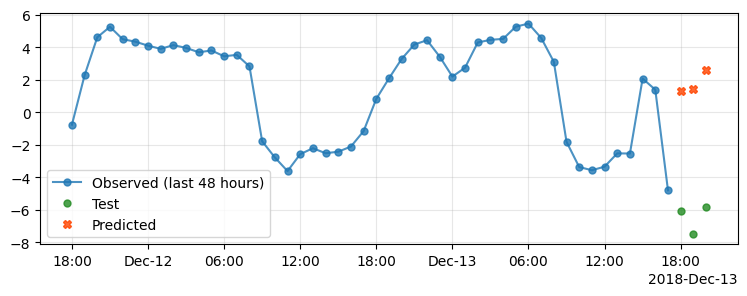

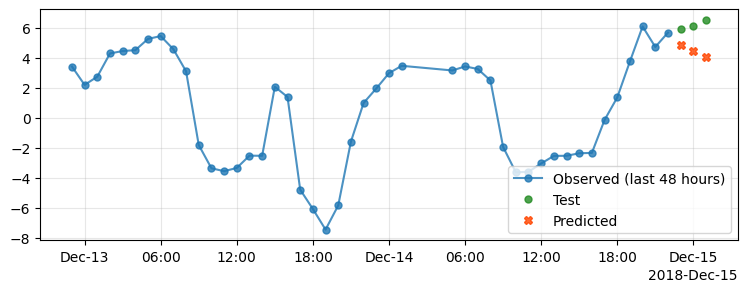

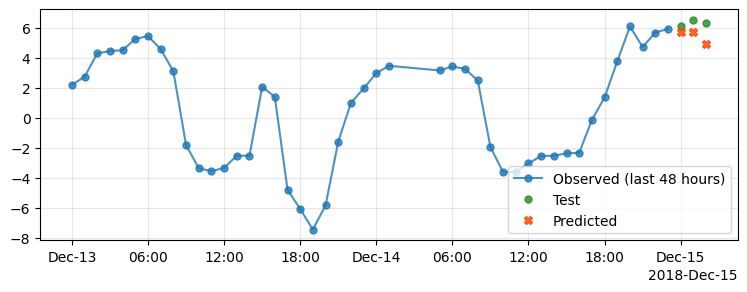

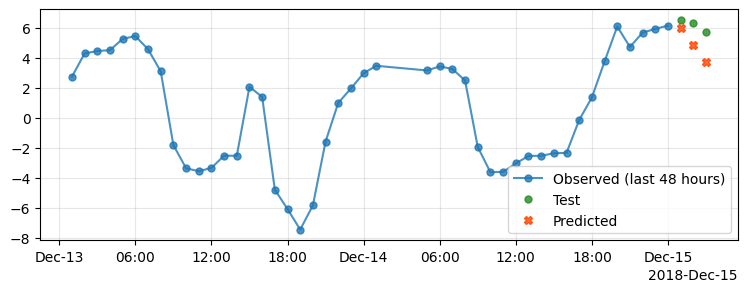

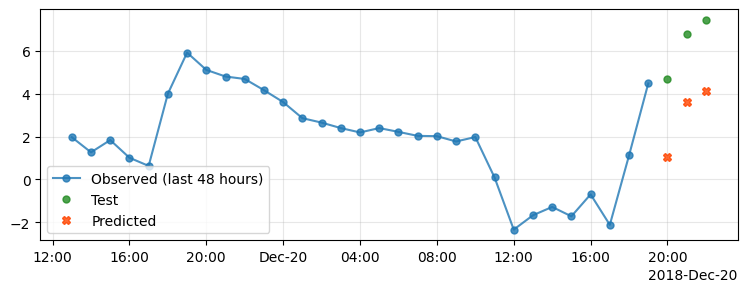

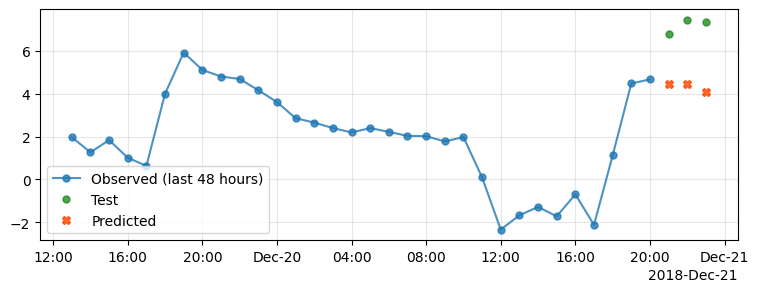

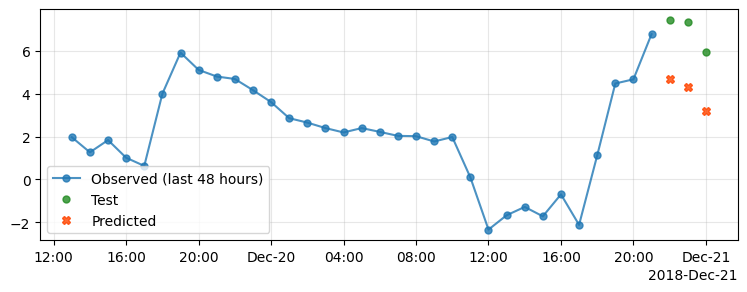

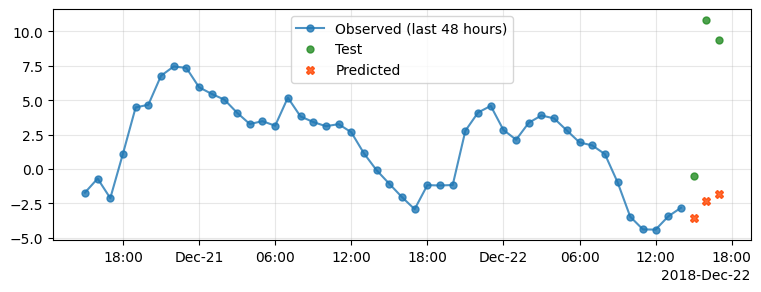

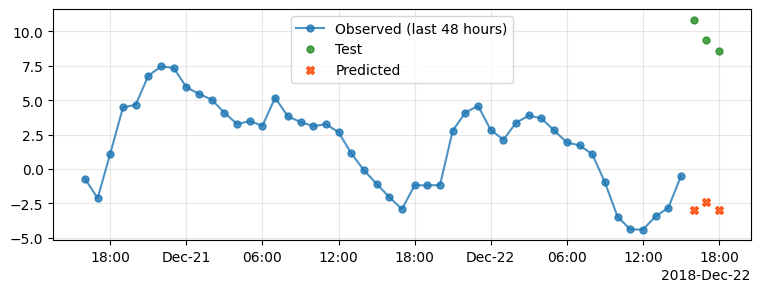

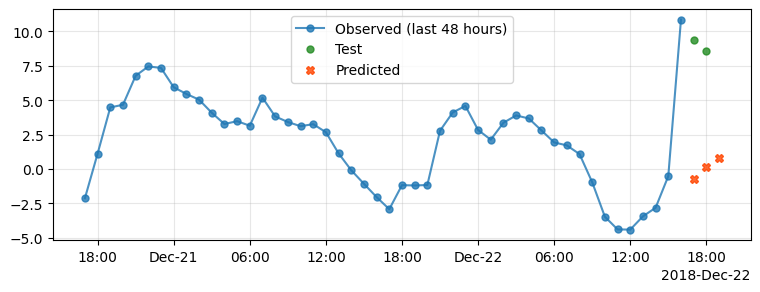

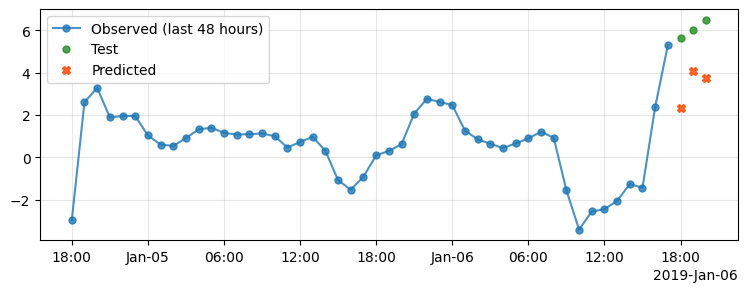

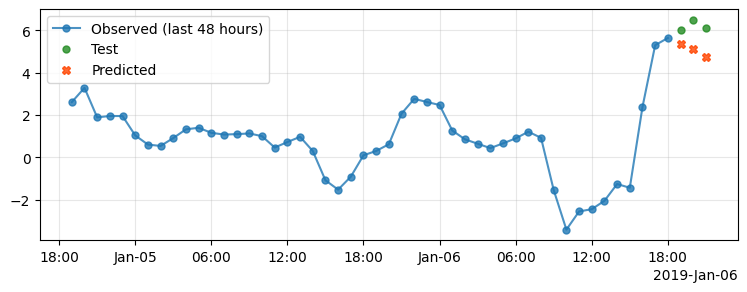

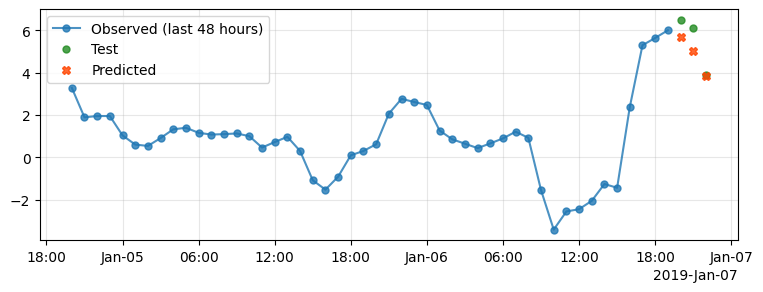

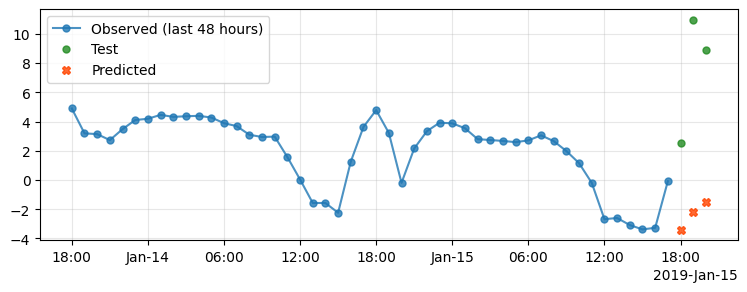

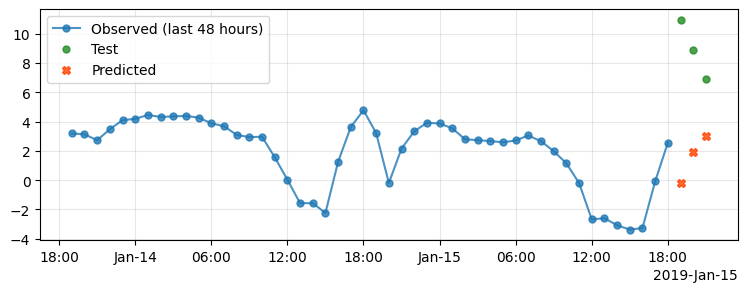

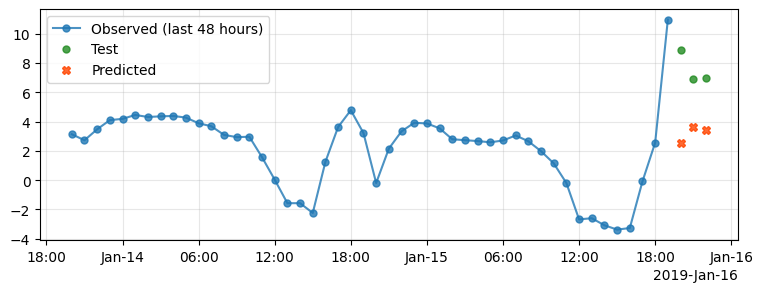

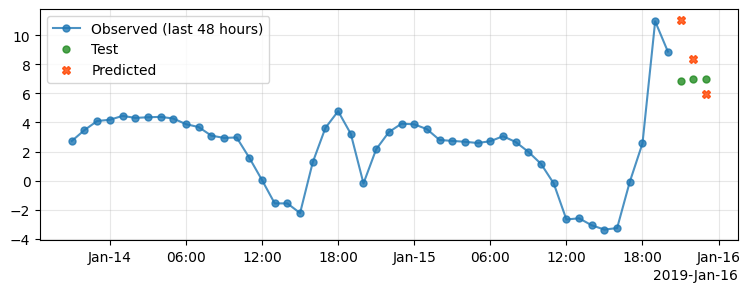

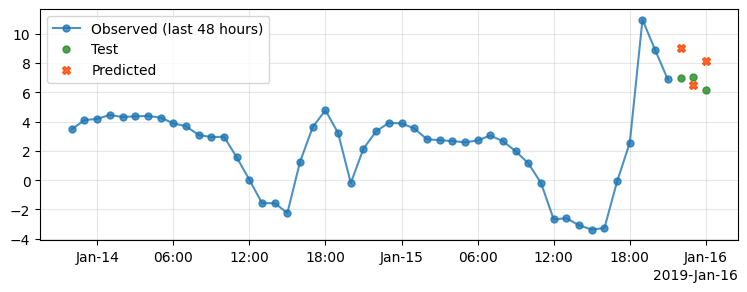

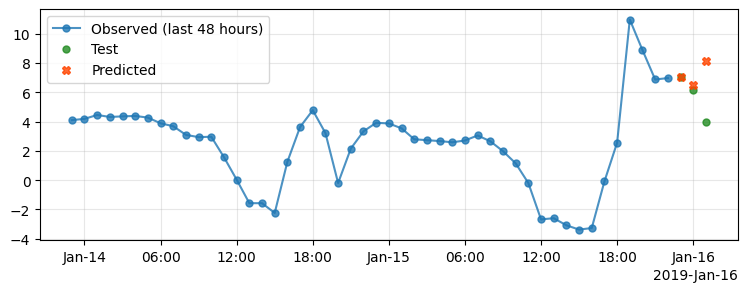

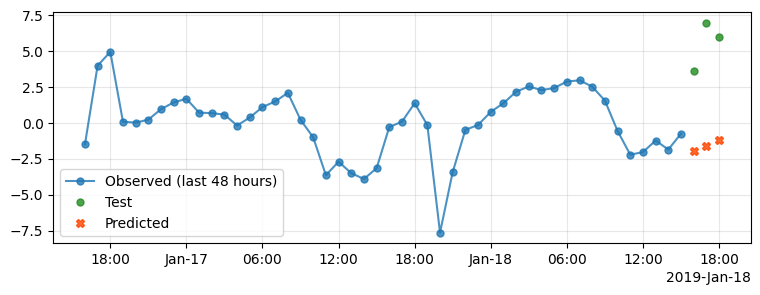

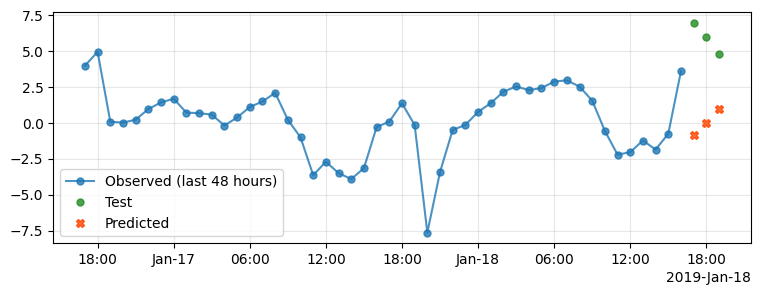

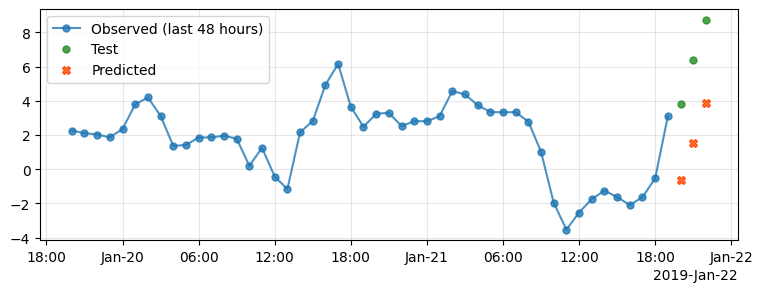

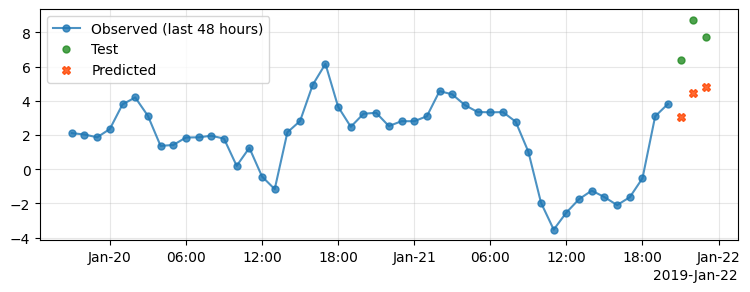

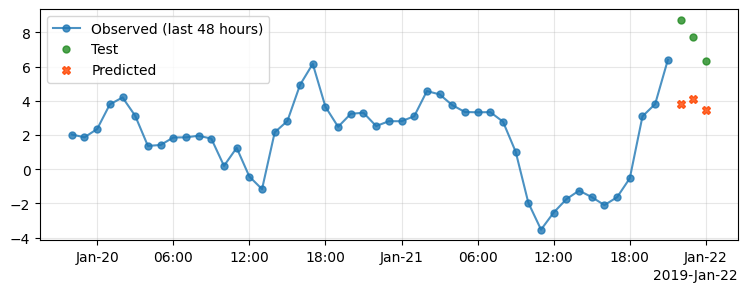

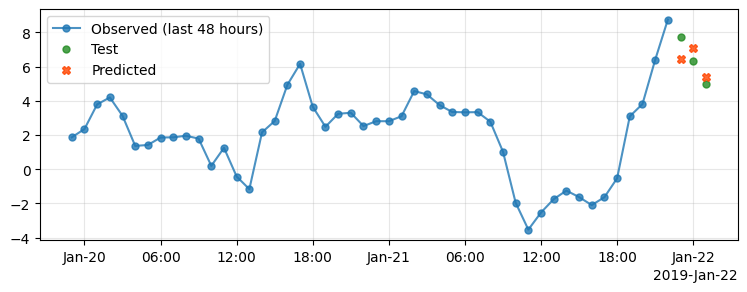

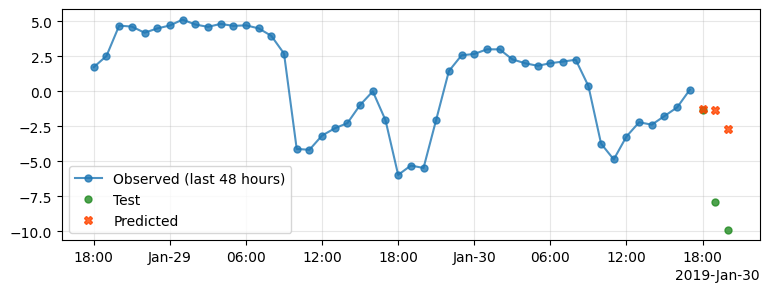

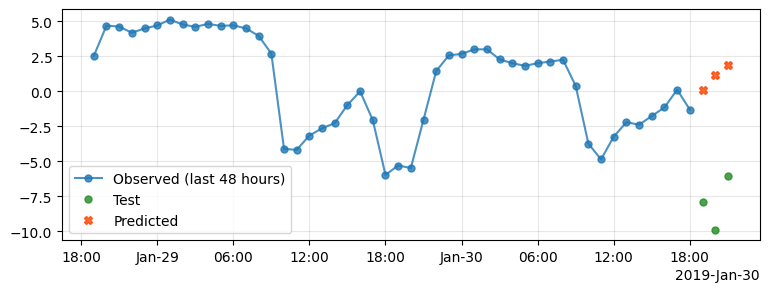

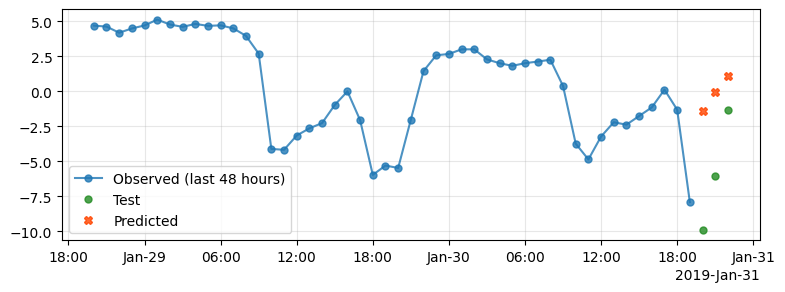

In [123]:
converter = mdates.ConciseDateConverter()
munits.registry[np.datetime64] = converter
munits.registry[datetime.date] = converter
munits.registry[datetime.datetime] = converter

for i in y_pred.index:
    pred = y_pred.loc[[i]]
    start_date = pred.timestamp.unique()[0] + np.timedelta64(1,'h')
    pred = pred.drop("timestamp", axis=1).T
    pred.index = pd.date_range(start=start_date, periods=steps, freq="H")
    pred.columns = ["uhi"]
    past_data = 48
    train_plot = test[pred.index[0]-np.timedelta64(past_data,'h'):pred.index[0]-np.timedelta64(1,'h')]
    test_plot = test[pred.index[0]:pred.index[-1]]
    if sum(test_plot.uhi > 6) > 1 or sum(test_plot.uhi < -6) > 1:
        fig, ax = plt.subplots(figsize=(9,3))
        ax.plot(train_plot, label=f"Observed (last {past_data} hours)", marker=".", markersize=10, alpha=0.8)
        ax.plot(test_plot, label="Test", ls="", marker=".", markersize=10, color="forestgreen", alpha=0.8)
        ax.plot(pred, label="Predicted", ls="", marker="X", markersize=6, color="orangered", alpha=0.8)
        ax.legend()
        ax.grid(alpha=0.3)

In [124]:
test_dfs = []
pred_dfs = []
mse = []
for i in y_pred.index:
    pred = y_pred.loc[[i]]
    start_date = pred.timestamp.unique()[0] + np.timedelta64(1,'h')
    pred = pred.drop("timestamp", axis=1).T
    pred.index = pd.date_range(start=start_date, periods=steps, freq="H")
    pred.columns = ["uhi"]
    test_plot = test[pred.index[0]:pred.index[-1]]
    try:
        mse.append(mean_squared_error(test_plot, pred, squared=False))
        test_dfs.append(test_plot)
        pred_dfs.append(pred)
    except:
        pass

In [125]:
# plt.figure(dpi=100, figsize=(5,5))
# plt.scatter(y_test, y_pred, alpha=0.4, label='Predictions')
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', label='Perfect model', color='red')
# # plt.xlim(y_test.min(), y_test.max())
# # plt.ylim=(y_test.min(), y_test.max())
# plt.xlabel("Observed temp. (°C)")
# plt.ylabel("Predicted temp. (°C)")
# plt.grid(alpha=0.4)
# plt.legend()
# plt.show()

In [126]:
print(f"MSE")
print(f"Mean: {np.round(np.mean(mse), 2)}") 
print(f"Standard deviation: +-{np.round(np.std(mse), 2)}")

MSE
Mean: 1.33
Standard deviation: +-1.31


In [127]:
df_continuous_features.uhi.std()

1.8434378680358596